## Оглавление
- [Оглавление](#оглавление)
- [Виртуальное окружение и библиотеки](#виртуальное-окружение-и-библиотеки)
- [1. Предварительная обработка данных](#1-предварительная-обработка-данных)
  - [1.1. Чтение и загрузка данных](#11-чтение-и-загрузка-данных)
  - [1.2. Первичный анализ данных](#12-первичный-анализ-данных)
  - [1.3. Разделение выборки на обучающую и тестовую выборки](#13-разделение-выборки-на-обучающую-и-тестовую-выборки)
  - [1.4. Обработка вещественных признаков (заполнение пропусков)](#14-обработка-вещественных-признаков-заполнение-пропусков)
  - [1.5. Кодирование категориальных признаков](#15-кодирование-категориальных-признаков)
  - [1.6. Детекция выбросов и аномалий в данных](#16-детекция-выбросов-и-аномалий-в-данных)
  - [1.7. Подведение итогов раздела 1](#17-подведение-итогов-раздела-1)
- [2. Генерация новых признаков](#2-генерация-новых-признаков)
  - [2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции)](#21-корреляционный-анализ-входных-признаков-построение-тепловых-карт-корреляции)
  - [2.2. Исправление проблемы мультиколлинеарности в данных](#22-исправление-проблемы-мультиколлинеарности-в-данных)
  - [2.3. Скалирование данных](#23-скалирование-данных)
  - [2.4. Подведение итогов раздела 2](#24-подведение-итогов-раздела-2)
- [3. Выбор моделей ML и метрик](#3-выбор-моделей-ml-и-метрик)
    - [3.1. Анализ зависимостей признаков и целевого показателя](#31-анализ-зависимостей-признаков-и-целевого-показателя)
    - [3.2. Отбор пула моделей и обоснование](#32-отбор-пула-моделей-и-обоснование)
    - [3.3. Выбор пула метрик и целевой метрики для Optuna](#33-выбор-пула-метрик-и-целевой-метрики-для-optuna)
- [4. Обучение моделей ML и подбор гиперпараметров](#4-обучение-моделей-ml-и-подбор-гиперпараметров)
- [5. Вычисление метрик на новых данных](#5-вычисление-метрик-на-новых-данных)
- [6. Результат работы](#6-результат-работы)

Необходимо решить задачу **регрессии**: предсказать вещественный целевой признак **«Гармония Бессмертия»** по набору параметров работы портала.

В рамках работы последовательно выполняются:
- предобработка и очистка данных (типы, пропуски, выбросы/аномалии);
- анализ признаков и их связи с целевым показателем;
- генерация новых признаков и устранение мультиколлинеарности;
- выбор пула моделей (не более 5) и целевых метрик;
- обучение моделей, подбор гиперпараметров и сравнение качества;
- интерпретация лучшей модели и выводы.


| **№** | **Признак** | **Описание** | **Тип данных признака** |
| ------ | ---- | ---- | ---- |
| **1** | Вектор Мощи | Позиция магического механизма, управляющего режимом портала | Вещественный |
| **2** | Скорость перехода через портал | Скорость перемещения объекта при прохождении портала | Вещественный |
| **3** | Приток Силы Потока | Значение магического потока, питающего портал | Вещественный |
| **4** | Ритм магического ядра | Частота работы магического ядра портала | Вещественный |
| **5** | Поток Энергий | Интенсивность энергообмена в магическом контуре | Вещественный |
| **6** | Сила Левого Потока | Интенсивность левого энергетического канала | Вещественный |
| **7** | Сила Правого Потока | Интенсивность правого энергетического канала | Вещественный |
| **8** | Пламя Стихий | Температура магической энергии в ядре портала | Вещественный |
| **9** | Температура вдоха Истока | Температура воздуха на входе магического источника | Вещественный |
| **10** | Температура выдоха Истока | Температура воздуха на выходе магического источника | Вещественный |
| **11** | Приток давления Выдоха Истока | Поток давления, создаваемый в процессе "выдоха" Истока | Вещественный |
| **12** | Давление выдоха Истока | Давление на выходе магического источника | Вещественный |
| **13** | Давление вдоха Истока | Давление на входе магического источника | Вещественный |
| **14** | Древний Ветер | Дополнительный параметр магического окружения | Вещественный |
| **15** | Печать Чародея | Управляющий параметр контроля портала | Вещественный |
| **16** | Эмульсия Истока | Количество магического горючего/эмульсии | Вещественный |
| **17** | Дыхание Истока | Коэффициент угасания / дыхания энергии | Вещественный |
| **18** | Гармония Бессмертия | Показатель состояния портала, целевая переменная | Вещественный |
| **19** | Тип Вектора Мощи | Категориальный тип режима, связанный с Вектором Мощи | Категориальный |
| **20** | Номер пометки | Уникальный идентификатор записи | Целочисленный |


Целевым значением выступает признак: `Гармония Бессмертия`

Формулы прикладной области:

- `Общая мощность потоков` = `Сила Левого Потока` + `Сила Правого Потока` + `Приток Силы Потока` - можно использовать;
- `Мощность ядра` = `Ритм магического ядра` * `Приток Силы Потока` - можно использовать;
- `Общее давление на выходе` = `Приток давления Выдоха Истока` + `Давление выдоха Истока` - можно использовать;
- `Магическая производительность` = `Скорость перехода через портал` / `Эмульсия Истока` - можно использовать;
- `Эффективность ядра` = `Мощность ядра` / `Эмульсия Истока` - можно использовать;
- `Магическая мощность` = `Эмульсия Истока` + `Общее давление на выходе` + `Пламя Стихий` - можно использовать;
- `Степень износа магических источников` = `Дыхание Истока` / `Гармония Бессмертия` - нельзя использовать, так как участвует целевой признак;
- `Стабильность магии` = |`Давление Истока` - `Гармония Бессмертия`| - нельзя использовать, так как участвует целевой признак;
- `Баланс угасания` = `Стабильность магии` / `Скорость перехода через портал` - нельзя использовать, так как участвует целевой признак.

### Виртуальное окружение и библиотеки

- версия Python `3.14`;
- список ключевых библиотек и их версии;
- основные импорты;
- cлучайный сид `SEED`.

In [56]:
# python -m venv venv

In [57]:
# ./venv/scripts/activate

In [58]:
# pip install -r .\requierments.txt

| Библиотека | Версия | Назначение |
|-----------|--------|-----------|
| alembic | 1.17.2 | Миграции схемы базы данных (используется SQLAlchemy) |
| asttokens | 3.0.1 | Анализ токенов Python-кода в интерактивной среде |
| colorama | 0.4.6 | Цветной вывод текста в консоли |
| colorlog | 6.10.1 | Цветное логирование |
| comm | 0.2.3 | Взаимодействие компонентов Jupyter |
| contourpy | 1.3.3 | Построение контурных графиков |
| cycler | 0.12.1 | Управление циклами свойств в matplotlib |
| debugpy | 1.8.17 | Отладчик Python-кода |
| decorator | 5.2.1 | Утилиты для создания декораторов |
| executing | 2.2.1 | Определение исполняемого кода в интерактивной среде |
| fonttools | 4.61.0 | Работа со шрифтами |
| greenlet | 3.3.0 | Поддержка лёгких потоков (используется SQLAlchemy) |
| ipykernel | 7.1.0 | Ядро Python для Jupyter Notebook |
| ipython | 9.7.0 | Интерактивная оболочка Python |
| ipython_pygments_lexers | 1.1.1 | Подсветка синтаксиса IPython |
| jedi | 0.19.2 | Автодополнение и анализ кода |
| joblib | 1.5.2 | Параллельные вычисления и сохранение моделей |
| jupyter_client | 8.6.3 | Клиент для взаимодействия с Jupyter |
| jupyter_core | 5.9.1 | Базовая инфраструктура Jupyter |
| kiwisolver | 1.4.9 | Решение ограничений для графиков |
| llvmlite | 0.46.0 | Компиляция кода для numba |
| Mako | 1.3.10 | Шаблонизатор (используется alembic) |
| MarkupSafe | 3.0.3 | Безопасная обработка HTML и шаблонов |
| matplotlib | 3.10.7 | Визуализация данных |
| matplotlib-inline | 0.2.1 | Отображение графиков в Jupyter |
| nest-asyncio | 1.6.0 | Поддержка вложенных асинхронных циклов |
| numba | 0.63.1 | JIT-компиляция численных вычислений |
| numpy | 2.3.5 | Массивы и численные вычисления |
| optuna | 4.6.0 | Подбор гиперпараметров моделей |
| packaging | 25.0 | Работа с версиями и зависимостями пакетов |
| pandas | 2.3.3 | Обработка и анализ табличных данных |
| parso | 0.8.5 | Синтаксический анализ Python |
| pillow | 12.0.0 | Работа с изображениями |
| platformdirs | 4.5.0 | Определение системных директорий |
| prompt_toolkit | 3.0.52 | Интерактивный ввод в CLI |
| psutil | 7.1.3 | Мониторинг ресурсов системы |
| pure_eval | 0.2.3 | Безопасное вычисление выражений |
| Pygments | 2.19.2 | Подсветка синтаксиса |
| pyod | 2.0.6 | Детекция выбросов |
| pyparsing | 3.2.5 | Парсинг текстовых выражений |
| python-dateutil | 2.9.0.post0 | Работа с датами и временем |
| pytz | 2025.2 | Часовые пояса |
| PyYAML | 6.0.3 | Работа с YAML-файлами |
| pyzmq | 27.1.0 | Обмен сообщениями (ZeroMQ) |
| scikit-learn | 1.7.2 | Алгоритмы машинного обучения |
| scipy | 1.16.3 | Научные и численные вычисления |
| seaborn | 0.13.2 | Статистическая визуализация |
| six | 1.17.0 | Совместимость Python 2/3 |
| SQLAlchemy | 2.0.45 | ORM и работа с базами данных |
| stack-data | 0.6.3 | Анализ стека вызовов |
| threadpoolctl | 3.6.0 | Управление потоками в ML-библиотеках |
| tornado | 6.5.2 | Асинхронный сетевой фреймворк |
| tqdm | 4.67.1 | Индикаторы прогресса |
| traitlets | 5.14.3 | Конфигурация компонентов Jupyter |
| typing_extensions | 4.15.0 | Расширения типизации Python |
| tzdata | 2025.2 | База часовых поясов |
| wcwidth | 0.2.14 | Корректный вывод символов в терминале |


In [59]:
from pyod.models.cblof import CBLOF
from pyod.models.ocsvm import OCSVM
from pyod.models.iforest import IForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import BayesianRidge
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler


from scipy.stats import entropy
from pathlib import Path
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")


from sklearn.experimental import enable_iterative_imputer  # noqa: F401


SEED = 42
np.random.seed(SEED)

In [60]:
from sklearn.impute import IterativeImputer

# 1. Предварительная обработка данных

## 1.1. Чтение и загрузка данных 

In [61]:
df = pd.read_csv("portal_data.csv", encoding="utf-8", sep="|")
df.head()

,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
0,1.138,1.54332,289.964,141.318158,6677.380,7.584,7.584,464.006,736,-,1.096,Не определено,5.947,-,7.137,0.082,0.95,0.975,Слабый,0
1,2.088,-,6960.180,144.111767,6828.469,28.204,28.204,635.401,736,581.658,1.331,1.394603,7.282,1.019,10.655,0.287,0.95,0.975,Слабый,1
2,3.144,4.6299600000000005,8379.229,145.220853,7111.811,60.358,60.358,606.002,736,-,1.389,Не определено,7.574,-,13.086,0.259,0.95,0.975,Ниже среднего,2
3,4.161,6.17328,14724.395,162.050156,7792.630,113.774,113.774,661.471,736,-,1.658,Не определено,9.007,-,18.109,0.358,0.95,0.975,Ниже среднего,3
4,5.140,7.7166,21636.432,201.513586,8494.777,175.306,175.306,731.494,736,645.642,2.078,Не определено,11.197,1.026,26.373,0.522,0.95,0.975,Выше среднего,4


## 1.2. Первичный анализ данных

In [62]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  object 
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  object 
 12  Давление выдоха Истока          

`Скорость перехода через портал`, `Температура выдоха Истока`, `Давление вдоха Истока`, `Древний Ветер` сейчас имеют тип **object**, их нужно преобразовать в численный тип данных.

Также встречаются служебные значения `-` и `Не определено`, которые интерпретируем как пропуски.

In [63]:
df = df.replace({"-": np.nan, "Не определено": np.nan})

to_numeric_cols = [
    "Скорость перехода через портал",
    "Температура выдоха Истока",
    "Давление вдоха Истока",
    "Древний Ветер",
]
for c in to_numeric_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

In [64]:
df.describe(include="all")


,Вектор Мощи,Скорость перехода через портал,Приток Силы Потока,Ритм магического ядра,Поток Энергий,Сила Левого Потока,Сила Правого Потока,Пламя Стихий,Температура вдоха Истока,Температура выдоха Истока,Приток давления Выдоха Истока,Давление вдоха Истока,Давление выдоха Истока,Древний Ветер,Печать Чародея,Эмульсия Истока,Дыхание Истока,Гармония Бессмертия,Тип Вектора Мощи,Номер пометки
count,11934.000000,10731.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,2387.000000,11934.000000,2439.000000,11934.000000,2387.000000,11934.000000,11934.000000,11934.00000,11934.0000,11934,11934.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сильный,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978,NaN
mean,5.166667,7.721490,27247.498685,223.711688,8200.947312,227.335768,227.335768,735.495446,736.0,646.092576,2.352963,1.394603,12.297123,1.029413,33.641261,0.662440,0.97500,0.9875,NaN,5966.500000
std,2.626388,3.993642,22148.613155,81.061874,1091.315507,200.495889,200.495889,173.680552,0.0,71.394305,1.084770,0.000000,5.337448,0.010217,25.841363,0.507132,0.01472,0.0075,NaN,3445.193391
min,1.138000,1.543320,253.547000,136.939406,6589.002000,5.304000,5.304000,442.364000,736.0,542.994000,1.093000,1.394603,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750,NaN,0.000000
25%,3.144000,4.629960,8375.883750,145.220958,7058.324000,60.317000,60.317000,589.872750,736.0,579.362000,1.389000,1.394603,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810,NaN,2983.250000
50%,5.140000,7.716600,21630.659000,201.514947,8482.081500,175.268000,175.268000,706.038000,736.0,636.963000,2.083000,1.394603,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875,NaN,5966.500000
75%,7.148000,10.803240,39001.426750,280.447777,9132.606000,332.364750,332.364750,834.066250,736.0,692.152000,2.981000,1.394603,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940,NaN,8949.750000


`Температура вдоха Истока` имеет одно и то же значение во всех строках признака, поэтому имеет смысл удалить данный признак.

In [65]:
df.isna().sum().sort_values(ascending=False)

Древний Ветер                     9547
Температура выдоха Истока         9547
Давление вдоха Истока             9495
Скорость перехода через портал    1203
Ритм магического ядра                0
Приток Силы Потока                   0
Вектор Мощи                          0
Поток Энергий                        0
Пламя Стихий                         0
Сила Правого Потока                  0
Температура вдоха Истока             0
Сила Левого Потока                   0
Приток давления Выдоха Истока        0
Давление выдоха Истока               0
Печать Чародея                       0
Эмульсия Истока                      0
Дыхание Истока                       0
Гармония Бессмертия                  0
Тип Вектора Мощи                     0
Номер пометки                        0
dtype: int64

In [66]:
na_share = df.isna().mean().sort_values(ascending=False)
na_share.head(10)


Древний Ветер                     0.799983
Температура выдоха Истока         0.799983
Давление вдоха Истока             0.795626
Скорость перехода через портал    0.100804
Ритм магического ядра             0.000000
Приток Силы Потока                0.000000
Вектор Мощи                       0.000000
Поток Энергий                     0.000000
Пламя Стихий                      0.000000
Сила Правого Потока               0.000000
dtype: float64

В признаках: `Температура выдоха Истока`, `Давление вдоха Истока`, `Древний Ветер` - почти полностью отсутствуют данные, поэтому их лучше полностью удалить.

`Номер пометки` не имеет смысла, так как является простым номером строки.

In [67]:
drop_cols = [
    "Температура вдоха Истока",
    "Температура выдоха Истока",
    "Давление вдоха Истока",
    "Древний Ветер",
    "Номер пометки",
]

df = df.drop(columns=drop_cols, errors="ignore")

## 1.3. Разделение выборки на обучающую и тестовую выборки

In [68]:
X = df.drop(columns=["Гармония Бессмертия"])
y = df["Гармония Бессмертия"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED
)

len(X_train), len(X_test)

(9547, 2387)

## 1.4. Обработка вещественных признаков (заполнение пропусков)

In [69]:
missing = X_train["Скорость перехода через портал"].isna().sum()
total = len(X_train)

missing / total

np.float64(0.10065989316015503)

Процент пропусков в признаке `Скорость перехода через портал` имеет процентр пропусков ~10%, поэтому для заполенния попробуем использовать два способа заполнения:
* статистический подход,
* машинный подход;

In [70]:
X_train["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     961
3.08664     980
4.62996     924
6.17328     959
7.71660     950
9.25992     932
10.80324    956
12.34656    957
13.88988    967
Name: count, dtype: int64

Также во всей выборке, всего лишь 13 различных значений, значит, делаем вывод, что признак вероятнее всего категориальный.

In [71]:
speed_col = "Скорость перехода через портал"

levels = np.sort(X_train[speed_col].dropna().unique())
levels

array([ 1.54332,  3.08664,  4.62996,  6.17328,  7.7166 ,  9.25992,
       10.80324, 12.34656, 13.88988])

Статистический подход к заполнений пропусков.

Т.к. процент пропусков 10%, то попробуем заполнить медианой среди дискретных значений, самым часто встречающимся значением.

In [72]:
def nearest_level(x, levels):
    return levels[np.argmin(np.abs(levels - x))]


def get_distribution(series, allowed_values):
    counts = series.value_counts().reindex(allowed_values, fill_value=0)
    probs = counts / counts.sum()
    return probs.values

In [73]:
X_train_median = X_train.copy()
X_train_moda = X_train.copy()

In [74]:
median = X_train['Скорость перехода через портал'].median()
X_train_median['Скорость перехода через портал'] = X_train['Скорость перехода через портал'].fillna(
    median)

In [75]:
mode_value = (
    X_train['Скорость перехода через портал']
    .mode()
    .iloc[0]
)

X_train_moda['Скорость перехода через портал'] = (
    X_train['Скорость перехода через портал']
    .fillna(mode_value)
)

In [76]:
col = 'Скорость перехода через портал'

allowed_values = (
    X_train[col]
    .dropna()
    .sort_values()
    .unique()
)

p_original = get_distribution(
    X_train[col].dropna(),
    allowed_values
)

In [77]:
p_median = get_distribution(
    X_train_median['Скорость перехода через портал'],
    allowed_values
)

p_moda = get_distribution(
    X_train_moda['Скорость перехода через портал'],
    allowed_values
)

In [78]:
kl_median = entropy(p_original, p_median)
kl_mode = entropy(p_original, p_moda)

kl_median, kl_mode

(np.float64(0.028761835031905783), np.float64(0.02809051781656654))

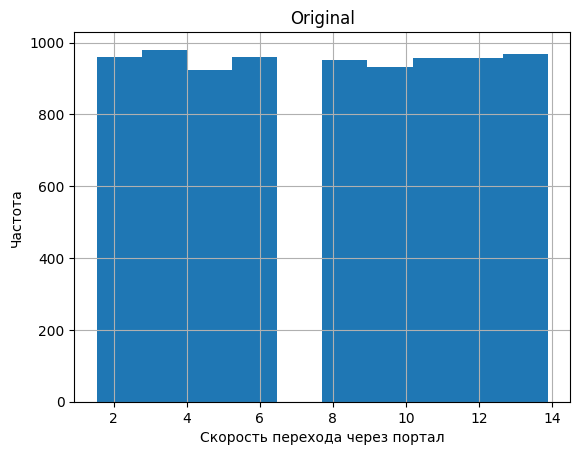

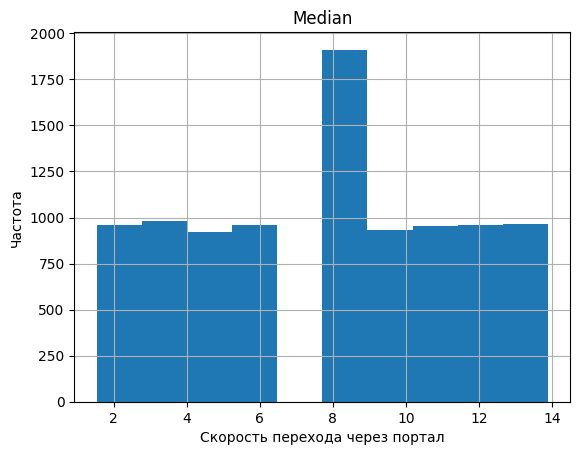

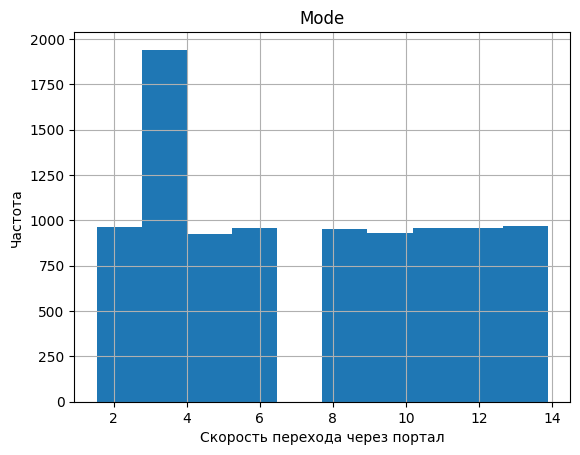

In [79]:
datasets = {
    "Original": X_train,
    "Median": X_train_median,
    "Mode": X_train_moda
}

for name, df in datasets.items():
    plt.figure()
    df["Скорость перехода через портал"].hist()
    plt.title(name)
    plt.xlabel("Скорость перехода через портал")
    plt.ylabel("Частота")
    plt.show()

Разница значений минимальна, но у моды значение ниже. Общее значение примерно `0.03`, что выше нормального значения (0.01 и ниже), но всё ещё допустимо, хотя на графике сильно разница распределений ярко выражена.

В дальнейшем можно использовать заполнение пропусков по `моде`.

Теперь применим `машинный подход` заполнения пропусков.

In [80]:
X_train_KNN = X_train.copy()
X_train_MICE = X_train.copy()
X_train_IterativeImputer = X_train.copy()

Проверим с помощью `KNNImputer` и подгоним под ближайшие дискретные значения, в случае недискретных рещультатов.

In [81]:
missing_mask = X_train["Скорость перехода через портал"].isna()

num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns

imputer = KNNImputer(n_neighbors=5)
X_train_KNN[num_cols] = imputer.fit_transform(X_train[num_cols])

X_train_KNN.loc[missing_mask, "Скорость перехода через портал"] = X_train_KNN.loc[missing_mask, "Скорость перехода через портал"].apply(
    lambda x: nearest_level(x, levels)
)

Теперь попробуем заполнить пропуски с помощью `IterativeImputer` и сразу подгоним под ближайшие дискретные значения.

In [82]:
col = "Скорость перехода через портал"

missing_mask = X_train[col].isna()
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
speed_levels = np.sort(X_train[col].dropna().unique())

X_train_iter = X_train.copy()

iter_imputer = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=42,
    initial_strategy="median"
)

X_train_IterativeImputer[num_cols] = iter_imputer.fit_transform(
    X_train[num_cols])

X_train_IterativeImputer.loc[missing_mask, col] = X_train_IterativeImputer.loc[missing_mask, col].apply(
    lambda x: nearest_level(x, speed_levels)
)

Пробуем заполнить пропуски с помощью `MICE` и сразу подгоним под ближайшие дискретные значения.

In [83]:
col = "Скорость перехода через портал"

missing_mask = X_train[col].isna()
num_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
speed_levels = np.sort(X_train[col].dropna().unique())

m = 5
imputed_values = []

for seed in range(100, 100 + m):
    tmp = X_train.copy()

    mice_imputer = IterativeImputer(
        estimator=BayesianRidge(),
        max_iter=10,
        random_state=seed,
        initial_strategy="median",
        sample_posterior=True
    )

    tmp[num_cols] = mice_imputer.fit_transform(X_train[num_cols])

    imputed_values.append(tmp.loc[missing_mask, col].to_numpy())

imputed_values = np.vstack(imputed_values)
final_fill = np.median(imputed_values, axis=0)

X_train_MICE = X_train.copy()
X_train_MICE[num_cols] = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=42,
    initial_strategy="median"
).fit_transform(X_train[num_cols])

X_train_MICE.loc[missing_mask, col] = final_fill

X_train_MICE.loc[missing_mask, col] = X_train_MICE.loc[missing_mask, col].apply(
    lambda x: nearest_level(x, speed_levels)
)

In [84]:
X_train_KNN["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     1067
3.08664     1080
4.62996     1041
6.17328     1080
7.71660     1054
9.25992     1043
10.80324    1071
12.34656    1048
13.88988    1063
Name: count, dtype: int64

In [85]:
X_train_IterativeImputer["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     1067
3.08664     1080
4.62996     1041
6.17328     1080
7.71660     1054
9.25992     1043
10.80324    1071
12.34656    1048
13.88988    1063
Name: count, dtype: int64

In [86]:
X_train_MICE["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     1067
3.08664     1080
4.62996     1041
6.17328     1080
7.71660     1054
9.25992     1043
10.80324    1071
12.34656    1048
13.88988    1063
Name: count, dtype: int64

Все 3 метода выдают одинаковый результат, но скорость обработки у IterativeImputer выше.

In [87]:
p_IterativeImputer = get_distribution(
    X_train_IterativeImputer['Скорость перехода через портал'],
    allowed_values
)

In [88]:
kl_IterativeImputer = entropy(p_original, p_IterativeImputer)

kl_IterativeImputer, kl_median, kl_mode

(np.float64(4.8974673739123975e-05),
 np.float64(0.028761835031905783),
 np.float64(0.02809051781656654))

У машинного подхода KL-дивергенция сильно ниже, поэтому будем использовать его.

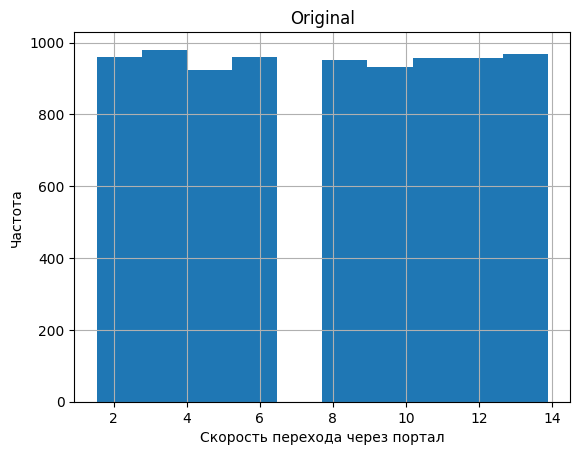

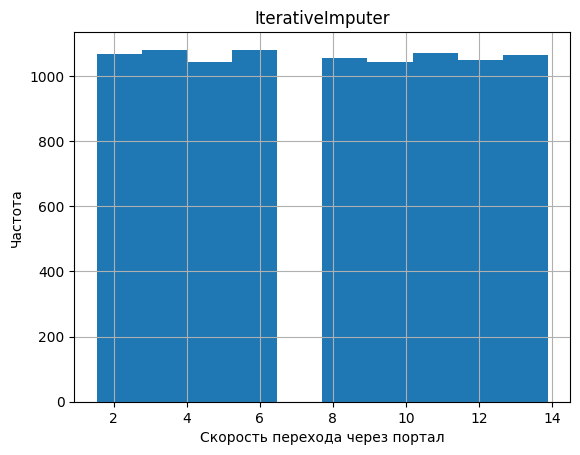

In [89]:
datasets = {
    "Original": X_train,
    "IterativeImputer": X_train_IterativeImputer,
}

for name, df in datasets.items():
    plt.figure()
    df["Скорость перехода через портал"].hist()
    plt.title(name)
    plt.xlabel("Скорость перехода через портал")
    plt.ylabel("Частота")
    plt.show()

KL-дивергенция сильно ниже чем у медианы и моды, при этом распределение пратически индентично изначальному, значит для заполнению пропусков рационально использовать `IterativeImputer`.

In [90]:
X_train = X_train_IterativeImputer.copy()

In [91]:
X_test["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     241
3.08664     219
4.62996     250
6.17328     221
7.71660     250
9.25992     255
10.80324    230
12.34656    247
13.88988    232
Name: count, dtype: int64

In [92]:
col = "Скорость перехода через портал"

missing_mask_test = X_test[col].isna()


X_test[num_cols] = iter_imputer.transform(X_test[num_cols])

X_test.loc[missing_mask_test, col] = (
    X_test.loc[missing_mask_test, col]
    .apply(lambda x: nearest_level(x, speed_levels))
)

X_test["Скорость перехода через портал"].value_counts().sort_index()

Скорость перехода через портал
1.54332     259
3.08664     246
4.62996     285
6.17328     246
7.71660     272
9.25992     283
10.80324    255
12.34656    278
13.88988    263
Name: count, dtype: int64

## 1.5. Кодирование категориальных признаков

Видим категориальный признак `Тип Вектора Мощи`, закодируем его.

Категории имеют строгий порядок, поэтому в первую очередь будем использовать `OrdinalEncoder`. Также добавим возможность тестирования `One-Hot` в будущем, как альтернативу.

Ещё проверим `Target Encoding`, но вероятность успеха маловероятна, т.к. малое кол-во категорий.

In [93]:
X_train["Тип Вектора Мощи"].value_counts()

Тип Вектора Мощи
Сильный          3182
Слабый           2147
Ниже среднего    2121
Выше среднего    2097
Name: count, dtype: int64

In [94]:
vector_types = ["Слабый", "Ниже среднего", "Выше среднего", "Сильный"]

In [95]:
old_X_train = X_train.copy()
old_X_test = X_test.copy()

In [96]:
X_train = old_X_train.copy()
X_test = old_X_test.copy()

In [97]:
order = [vector_types]

encoder = OrdinalEncoder(categories=order)
X_train["Тип Вектора Мощи"] = encoder.fit_transform(
    X_train[["Тип Вектора Мощи"]])

Для работы далее используем `OrdinalEncoder`.

In [98]:
X_test["Тип Вектора Мощи"] = encoder.transform(
    X_test[["Тип Вектора Мощи"]])

## 1.6. Детекция выбросов и аномалий в данных

In [99]:
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

Используем "Ящики с усами" для поиска выбросов

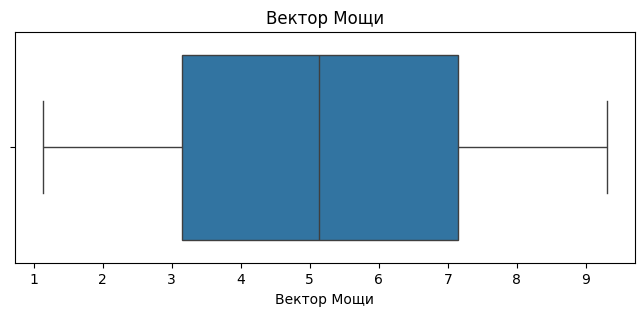

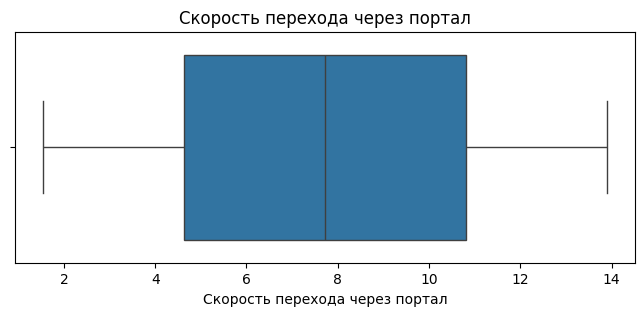

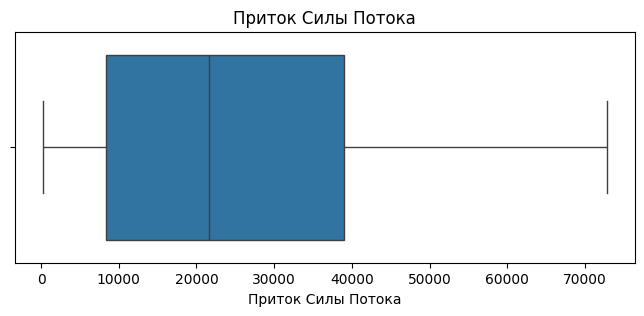

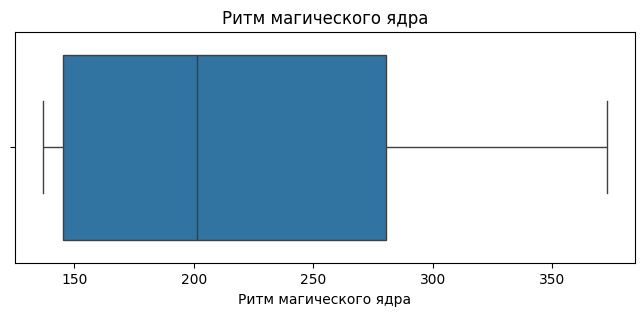

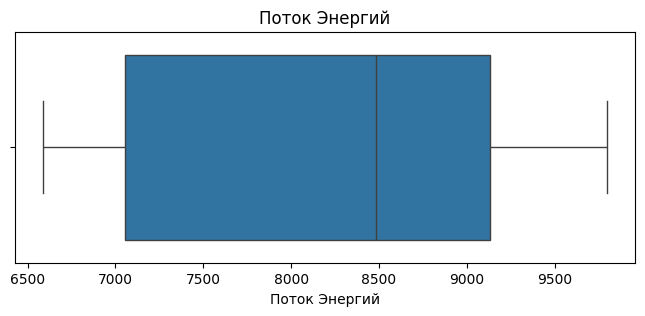

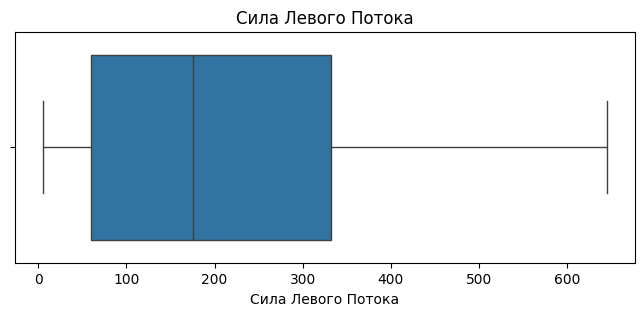

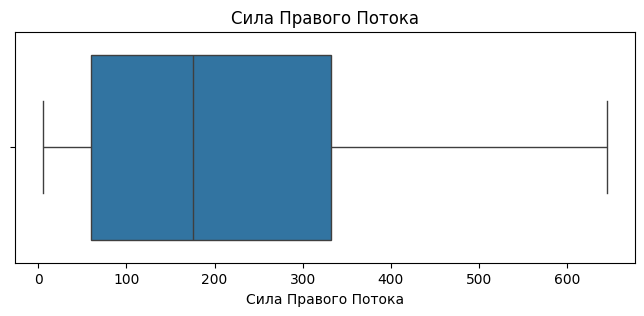

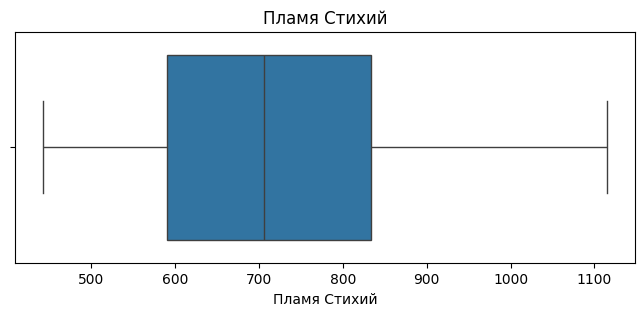

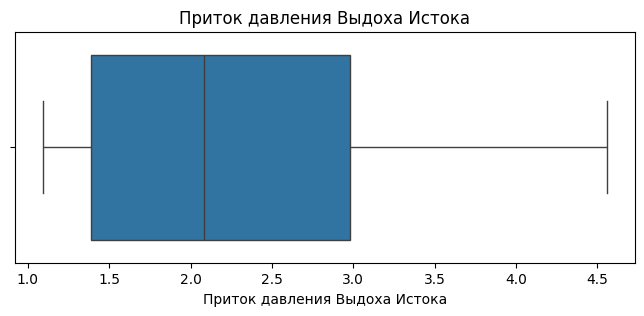

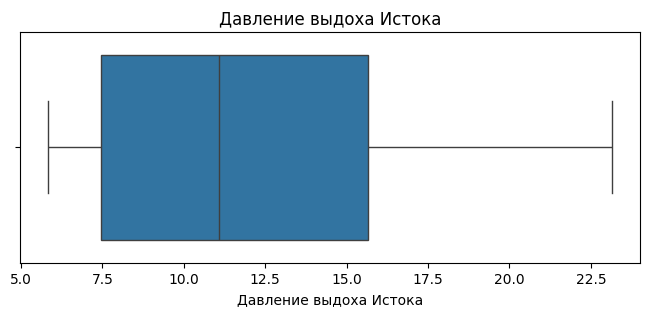

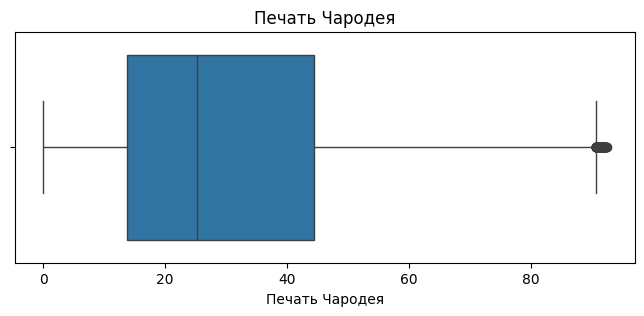

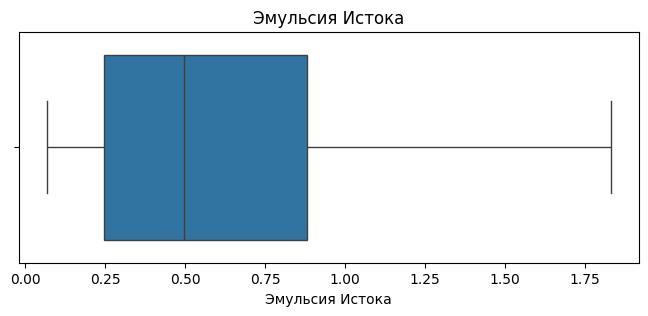

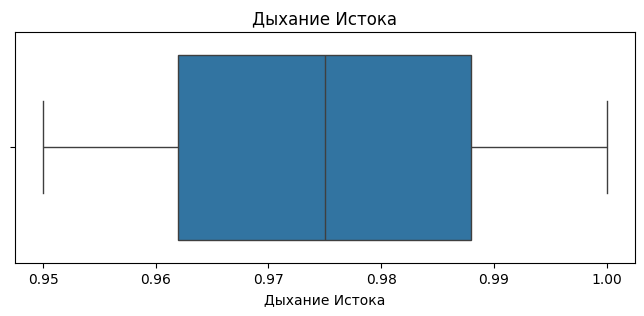

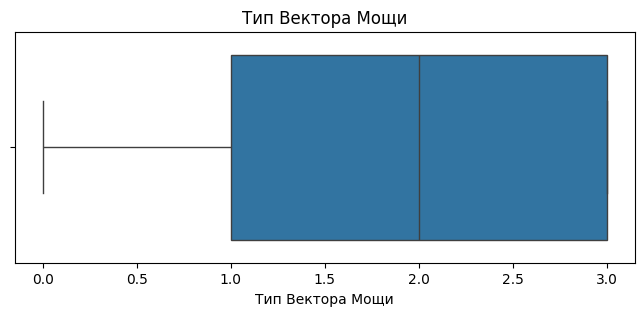

In [100]:
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=X_train[col])
    plt.title(col)
    plt.show()

Из всех графиков выделяется только `Печать чародея`.

Справа от графика видны потенциальные выбросы.

In [101]:
def iqr_outliers_mask(s: pd.Series, k: float = 1.5) -> pd.Series:
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    low = q1 - k * iqr
    high = q3 + k * iqr
    return (s < low) | (s > high)


def robust_z_outliers_mask(s: pd.Series, thr: float = 3.5) -> pd.Series:
    med = s.median()
    mad = (s - med).abs().median()
    if mad == 0:
        return pd.Series(False, index=s.index)
    rz = 0.6745 * (s - med) / mad
    return rz.abs() > thr

In [102]:
potencial_cols = ["Печать Чародея"]

outlier_idx_by_col = {}
outlier_idx_all = set()

for col in potencial_cols:
    s = X_train[col]

    mask_iqr = iqr_outliers_mask(s, k=1.5)
    mask_rz = robust_z_outliers_mask(s, thr=3.5)

    print(
        f"{col}: IQR={len(set(s.index[mask_iqr]))} RZ={len(set(s.index[mask_rz]))}")

    mask_both = mask_iqr & mask_rz
    idx_col = set(s.index[mask_both])

    outlier_idx_by_col[col] = idx_col
    outlier_idx_all |= idx_col

len(outlier_idx_all)

Печать Чародея: IQR=186 RZ=0


0

По итогам работы IQR и Robust Z-score выбросы в `Печать Чародея` не были найдены.

При этом IQR нашёл 186, а Robust не нашёл вовсе.

In [103]:
X_train["Печать Чародея"].describe()

count    9547.00000
mean       33.59335
std        25.85155
min         0.00000
25%        13.75650
50%        25.24200
75%        44.52950
max        92.47600
Name: Печать Чародея, dtype: float64

Попробуем разобраться почему так вышло.

Q1 = 13.76

Q3 = 44.53

IQR = Q3 - Q1 = 30.77

high = Q3 + 1.5 * IQR = 90.68

Верхняя граница совсем немного ниже максимального значения, значит вероятнее всего предполагаемые выбросы таковыми не являются.

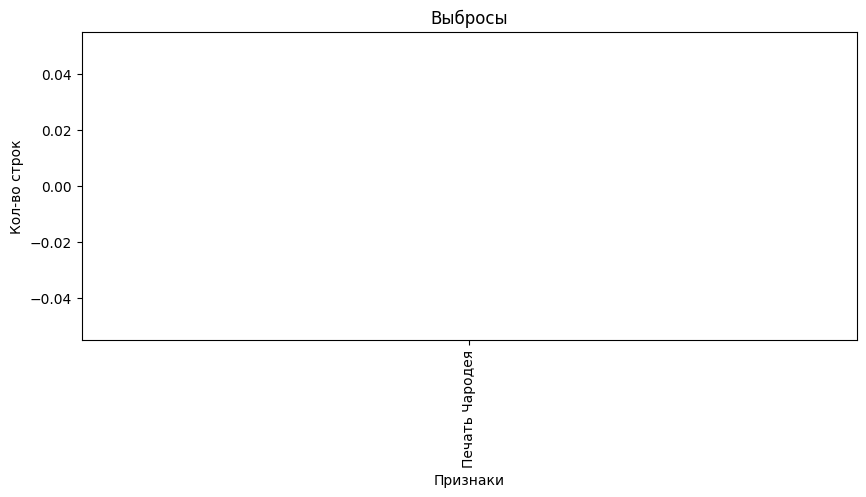

Строк с выбросами: 0


In [104]:
counts = pd.Series({col: len(
    idxs) for col, idxs in outlier_idx_by_col.items()}).sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=90)
plt.title("Выбросы")
plt.ylabel("Кол-во строк")
plt.xlabel("Признаки")
plt.show()

print("Строк с выбросами:",
      len(outlier_idx_all))

In [105]:
X_train_no_outliers = X_train.drop(
    index=list(outlier_idx_all), errors="ignore")
print("Было:", len(X_train), "Стало после удаления выбросов:",
      len(X_train_no_outliers))

Было: 9547 Стало после удаления выбросов: 9547


In [106]:
X_train = X_train_no_outliers.copy()

Проверим выборку на наличие аномалий.

In [107]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train)

In [108]:
m_if = IForest(contamination=0.02, random_state=42)
m_if.fit(X_scaled)
labels_if = m_if.labels_
is_if_anom = (labels_if == 1)
idx_if = set(X_train.index[is_if_anom])

In [109]:
m_sv = OCSVM(contamination=0.02, kernel="rbf", gamma="scale")
m_sv.fit(X_scaled)
labels_sv = m_sv.labels_
is_sv_anom = (labels_sv == 1)
idx_sv = set(X_train.index[is_sv_anom])

In [110]:
cblof = CBLOF(
    contamination=0.02,
    n_clusters=15,
    alpha=0.9,
    beta=5,
    check_estimator=False,
    random_state=42
)

cblof.fit(X_scaled)

labels_cb = (cblof.labels_ == 1)

idx_cb = set(X_train.index[labels_cb])

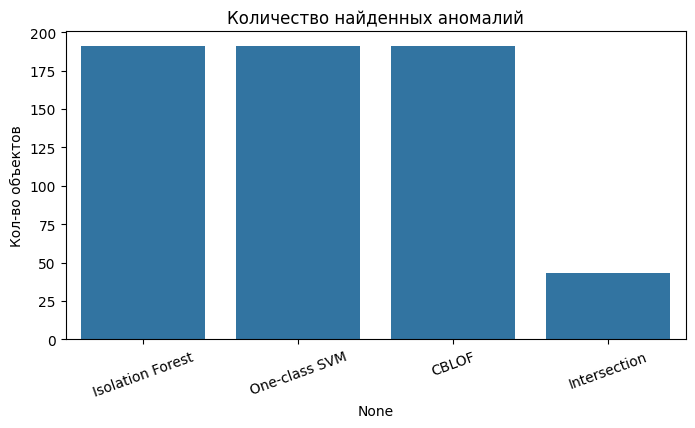

IForest anomalies: 191
OCSVM anomalies: 191
CBLOF anomalies: 191
Intersection (all 3): 43


In [111]:
idx_anom_intersection = idx_if & idx_sv & idx_cb

counts_anom = pd.Series({
    "Isolation Forest": len(idx_if),
    "One-class SVM": len(idx_sv),
    "CBLOF": len(idx_cb),
    "Intersection": len(idx_anom_intersection)
})

plt.figure(figsize=(8, 4))
sns.barplot(x=counts_anom.index, y=counts_anom.values)
plt.title("Количество найденных аномалий")
plt.ylabel("Кол-во объектов")
plt.xticks(rotation=20)
plt.show()

print("IForest anomalies:", len(idx_if))
print("OCSVM anomalies:", len(idx_sv))
print("CBLOF anomalies:", len(idx_cb))
print("Intersection (all 3):", len(idx_anom_intersection))

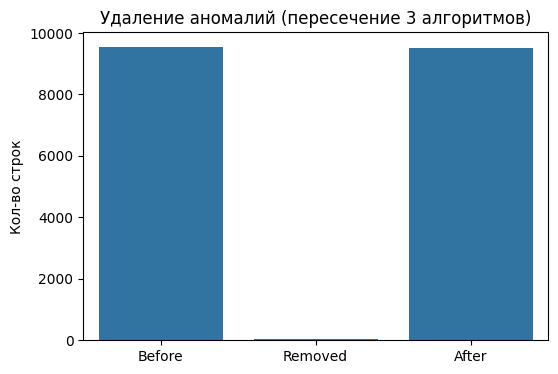

Было: 9547
Удалено аномалий: 43
Стало после удаления аномалий: 9504


In [112]:
X_train_final = X_train.drop(
    index=list(idx_anom_intersection), errors="ignore")

y_train_final = y_train.drop(
    index=list(idx_anom_intersection), errors="ignore"
)

removed = len(idx_anom_intersection)
kept_before = len(X_train)
kept_after = len(X_train_final)

plt.figure(figsize=(6, 4))
sns.barplot(x=["Before", "Removed", "After"], y=[
            kept_before, removed, kept_after])
plt.title("Удаление аномалий (пересечение 3 алгоритмов)")
plt.ylabel("Кол-во строк")
plt.show()

print("Было:", kept_before)
print("Удалено аномалий:", removed)
print("Стало после удаления аномалий:", kept_after)

In [113]:
X_train = X_train_final.copy()
y_train = y_train_final.copy()

## 1.7. Подведение итогов раздела 1

Выполнено:
- загружен датасет, для признаков `Скорость перехода через портал`, `Температура выдоха Истока`, `Давление вдоха Истока` и `Древний Ветер` неопределённые значения заменены на пропуски, после чего данные приведены к числовому типу `float`;

- удалены признаки `Температура вдоха Истока`, `Температура выдоха Истока`, `Давление вдоха Истока`, `Древний Ветер`, `Номер пометки` как содержащие почти полностью отсутствующие значения либо не несущие полезной информации, а также исключён константный признак;

- на основе всех числовых признаков и категориального признака `Тип Вектора Мощи` сформированы обучающая и тестовая выборки в соотношении 0.8/0.2;

- выполнено восстановление пропусков в признаке `Скорость перехода через портал` с использованием итеративной импутации с последующим приведением значений к допустимым дискретным уровням;

- категориальный признак `Тип Вектора Мощи` закодирован методом one-hot кодирования;

- проведена проверка выбросов и аномалий по числовым признакам, из обучающей выборки удалены только наиболее подозрительные наблюдения, выявленные как пересечение нескольких методов.


# 2. Генерация новых признаков

## 2.1. Корреляционный анализ входных признаков (построение тепловых карт корреляции)

Построим тепловую карту корреляции **к целевому признаку**.

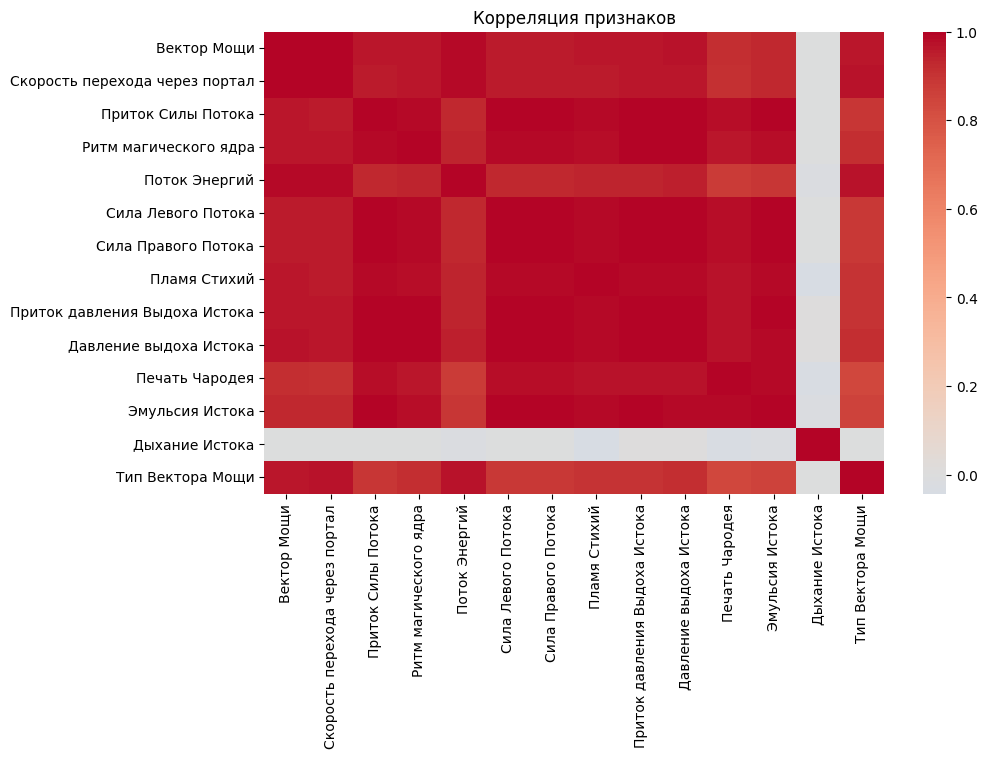

In [114]:
plt.figure(figsize=(10, 6))
corr_before = X_train.corr()
sns.heatmap(corr_before, cmap="coolwarm", center=0)
plt.title("Корреляция признаков")
plt.show()

Корреляция между большей часть признаков стримится к 1, что плохо скажется на обучаемой модели.

## 2.2. Исправление проблемы мультиколлинеарности в данных

Сгенерируем новые признаки по формулам предметной области и удалим исходные компоненты, чтобы уменьшить мультиколлинеарность.

In [115]:
def add_features(X: pd.DataFrame, drop_old: bool = True) -> pd.DataFrame:
    X["Общая мощность потоков"] = (
        X["Сила Левого Потока"] +
        X["Сила Правого Потока"] +
        X["Приток Силы Потока"]
    )

    X["Мощность ядра"] = (
        X["Ритм магического ядра"] *
        X["Приток Силы Потока"]
    )

    X["Общее давление на выходе"] = (
        X["Приток давления Выдоха Истока"] +
        X["Давление выдоха Истока"]
    )

    X["Магическая производительность"] = (
        X["Скорость перехода через портал"] /
        X["Эмульсия Истока"]
    )

    X["Эффективность ядра"] = (
        X["Мощность ядра"] /
        X["Эмульсия Истока"]
    )

    X["Магическая мощность"] = (
        X["Эмульсия Истока"] +
        X["Общее давление на выходе"] +
        X["Пламя Стихий"]
    )

    if drop_old:
        X.drop(
            columns=[
                "Сила Левого Потока",
                "Сила Правого Потока",
                "Приток Силы Потока",
                "Приток давления Выдоха Истока",
                "Давление выдоха Истока",
                "Эмульсия Истока",
                "Пламя Стихий",
                "Скорость перехода через портал"
            ],
            inplace=True
        )

    return X


X_new = add_features(X_train.copy())

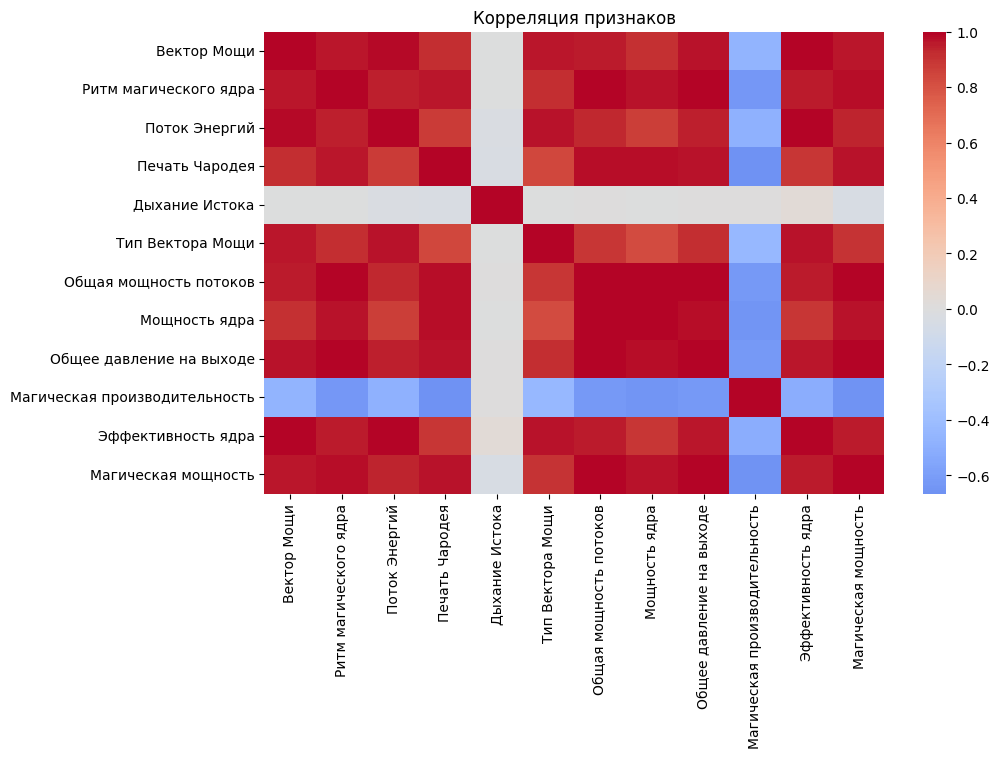

In [116]:
plt.figure(figsize=(10, 6))
corr_after = X_new.corr()
sns.heatmap(corr_after, cmap="coolwarm", center=0)
plt.title("Корреляция признаков")
plt.show()

Корреляция уменьшилась, но крайне незначительно, у нового признака `Магическая производительность` корреляция отрицательна и стремится -1.

In [117]:
X_new.describe()

,Вектор Мощи,Ритм магического ядра,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Общая мощность потоков,Мощность ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра,Магическая мощность
count,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9.504000e+03,9504.000000,9504.000000,9.504000e+03,9504.000000
mean,5.138421,222.801499,8189.897064,33.342977,0.975055,1.655303,27433.002172,7.768334e+06,14.574929,13.861078,8.733663e+06,748.611153
std,2.620762,80.662876,1089.929833,25.639559,0.014672,1.156890,22403.388315,8.414308e+06,6.385203,4.276634,4.396456e+06,179.575454
min,1.138000,136.939406,6589.002000,0.000000,0.950000,0.000000,267.547000,3.556916e+04,6.924000,4.566036,4.373923e+05,449.424000
25%,3.144000,145.220958,7054.012000,13.531250,0.962000,1.000000,8496.259000,1.216298e+06,8.831000,10.419038,4.905599e+06,598.511000
50%,5.140000,201.514843,8480.239000,25.212000,0.975000,2.000000,21980.476000,4.358770e+06,13.161000,13.637585,8.768642e+06,718.497500
75%,7.148000,280.447672,9131.573250,44.457000,0.988000,3.000000,39664.924750,1.093740e+07,18.619500,17.945581,1.269983e+07,852.013500
max,9.300000,372.879821,9795.386000,92.476000,1.000000,3.000000,74075.284000,2.714001e+07,27.691000,25.094634,1.591427e+07,1143.757000


In [118]:
X_new.describe()

,Вектор Мощи,Ритм магического ядра,Поток Энергий,Печать Чародея,Дыхание Истока,Тип Вектора Мощи,Общая мощность потоков,Мощность ядра,Общее давление на выходе,Магическая производительность,Эффективность ядра,Магическая мощность
count,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9504.000000,9.504000e+03,9504.000000,9504.000000,9.504000e+03,9504.000000
mean,5.138421,222.801499,8189.897064,33.342977,0.975055,1.655303,27433.002172,7.768334e+06,14.574929,13.861078,8.733663e+06,748.611153
std,2.620762,80.662876,1089.929833,25.639559,0.014672,1.156890,22403.388315,8.414308e+06,6.385203,4.276634,4.396456e+06,179.575454
min,1.138000,136.939406,6589.002000,0.000000,0.950000,0.000000,267.547000,3.556916e+04,6.924000,4.566036,4.373923e+05,449.424000
25%,3.144000,145.220958,7054.012000,13.531250,0.962000,1.000000,8496.259000,1.216298e+06,8.831000,10.419038,4.905599e+06,598.511000
50%,5.140000,201.514843,8480.239000,25.212000,0.975000,2.000000,21980.476000,4.358770e+06,13.161000,13.637585,8.768642e+06,718.497500
75%,7.148000,280.447672,9131.573250,44.457000,0.988000,3.000000,39664.924750,1.093740e+07,18.619500,17.945581,1.269983e+07,852.013500
max,9.300000,372.879821,9795.386000,92.476000,1.000000,3.000000,74075.284000,2.714001e+07,27.691000,25.094634,1.591427e+07,1143.757000


## 2.3. Скалирование данных

Сохраним датасет без скалирования и сделаем 3 датасета со скалированиями:

- StandardScaler
- MinMaxScaler
- RobustScaler

In [119]:
X_train_noscale = X_new.copy()

In [120]:
X_train_scale_std = pd.DataFrame(
    StandardScaler().fit_transform(X_new),
    columns=X_new.columns,
    index=X_new.index
)

X_train_scale_mm = pd.DataFrame(
    MinMaxScaler().fit_transform(X_new),
    columns=X_new.columns,
    index=X_new.index
)

X_train_scale_rb = pd.DataFrame(
    RobustScaler().fit_transform(X_new),
    columns=X_new.columns,
    index=X_new.index
)

In [121]:
X_new = add_features(X_test.copy())
X_test_noscale = X_new.copy()

X_test_scale_std = pd.DataFrame(
    StandardScaler().fit_transform(X_new),
    columns=X_new.columns,
    index=X_new.index
)

X_test_scale_mm = pd.DataFrame(
    MinMaxScaler().fit_transform(X_new),
    columns=X_new.columns,
    index=X_new.index
)

X_test_scale_rb = pd.DataFrame(
    RobustScaler().fit_transform(X_new),
    columns=X_new.columns,
    index=X_new.index
)

## 2.4. Подведение итогов раздела 2

Выполнено:
- построена тепловая карта корреляции к целевому признаку;
  
- сгенерированы новые признаки `Общая мощность потоков`, `Мощность ядра`, `Общее давление на выходе`, `Магическая производительность`, `Эффективность ядра`, `Магическая мощность`, исходные признаки `Сила Левого Потока`, `Сила Правого Потока`, `Приток Силы Потока`, `Приток давления Выдоха Истока`, `Давление выдоха Истока`, `Эмульсия Истока`, `Пламя Стихий`, `Скорость перехода через портал` удалены для снижения мультиколлинеарности;
  
- подготовлены варианты датасета с использованием различных методов скалирования: без скалирования, `StandardScaler`, `MinMaxScaler`, `RobustScaler`.


# 3. Выбор моделей ML и метрик

### 3.1. Анализ зависимостей признаков и целевого показателя

Задача - **регрессия**: необходимо предсказывать целевой признак `Гармония Бессмертия` по входным параметрам портала.
Перед выбором моделей проверяем характер зависимостей:

- строим тепловую карту зависимостей целевого признака от каждого;
- для признаков с наибольшей по модулю корреляцией строим **точечные графики**, чтобы увидеть линейность/нелинейность.

Это нужно, чтобы:
- понять, достаточно ли линейных моделей;
- оценить, нужны ли модели, умеющие нелинейности (деревья/ансамбли/SVR);
- решить вопрос со скалированием (важно для линейных моделей и SVM).

### 3.2. Отбор пула моделей и обоснование

При выборе опираемся на чек-лист отбора моделей для прогнозирования:
1) **вид зависимостей** (линейные/нелинейные);
2) **размер выборки** (у нас примерно 10k объектов - это средний датасет);
3) **размерность признаков** (после кодирования/генерации признаков - обычная, сильно < 200);
4) **интерпретируемость** (нужно понимать вклад признаков);
5) **сложность подбора гиперпараметров** (чтобы уложиться по времени).

Итоговый пул моделей (4 шт.):

1. **Ridge Regression (Ridge)** - линейная модель с L2-регуляризацией, в которой целевой показатель представляется как взвешенная сумма входных признаков, а коэффициенты подбираются с учётом регуляризации для получения устойчивого решения.
   
   \+ быстрый baseline, высокая интерпретируемость

   \+ устойчивость к мультиколлинеарности  
  
   − может недообучаться, если зависимости сильно нелинейные

2. **ElasticNet** - линейная модель с L1+L2-регуляризацией, комбинирующая два вида регуляризации, которая строит зависимость целевого показателя от признаков и регулирует вклад каждого из них в процессе обучения.
   
   \+ может занулять менее полезные признаки
   
   \+ интерпретируема по коэффициентам  
   
   − также может недообучаться на сложных нелинейностях  

3. **RandomForestRegressor** - ансамбль деревьев (bagging), состоящий из множества деревьев решений, итоговое предсказание которой формируется усреднением предсказаний отдельных деревьев.
   
   \+ хорошо ловит нелинейности и взаимодействия признаков  
   
   \+ устойчив к выбросам/разному масштабу признаков  
   
   − модель тяжелее линейных, риск переобучения без настройки

4. **HistGradientBoostingRegressor** - градиентный бустинг, последовательно добавляющий деревья решений, которые корректируют ошибки предыдущих шагов обучения.
   
   \+ часто даёт сильное качество на табличных данных  
   
   \+ умеет сложные зависимости  
   
   − интерпретируемость ниже, но можно анализировать важности

Не используем нейросети: датасет не очень большой, а подбор и обучение займут значительно больше времени.

### 3.3. Выбор пула метрик и целевой метрики для Optuna

Так как задача **регрессии**, используем такой набор метрик:

1) **MAE** (Mean Absolute Error) - средняя абсолютная ошибка  
MAE = (1 / n) · Σ |yᵢ − ŷᵢ|  
Хорошо интерпретируется, менее чувствительна к выбросам.

1) **MSE** (Mean Squared Error) - средняя квадратичная ошибка  
MSE = (1 / n) · Σ (yᵢ − ŷᵢ)²  
Сильнее штрафует большие ошибки, но хуже интерпретируется напрямую.

1) **RMSE** (Root Mean Squared Error) - корень из MSE  
RMSE = √[(1 / n) · Σ (yᵢ − ŷᵢ)²]  
Как и MAE в тех же единицах, но сильнее наказывает большие промахи.

1) **R²** (коэффициент детерминации) - доля объяснённой дисперсии  
R² = 1 − [Σ (yᵢ − ŷᵢ)² / Σ (yᵢ − ȳ)²]  
Удобен для сравнения, показывает, насколько модель лучше константного предсказания средним.

**Целевая метрика для Optuna:** выбираем **RMSE (минимизируем)**.  
Обоснование: RMSE интерпретируется в тех же единицах, что и целевой признак, и при этом сильнее штрафует большие ошибки, что важно для задач, где редкие большие промахи нежелательны.


y_train: 9504 y_test: 2387
no_scaling Xtr: (9504, 12) Xte: (2387, 12)
standard Xtr: (9504, 12) Xte: (2387, 12)
minmax Xtr: (9504, 12) Xte: (2387, 12)
robust Xtr: (9504, 12) Xte: (2387, 12)


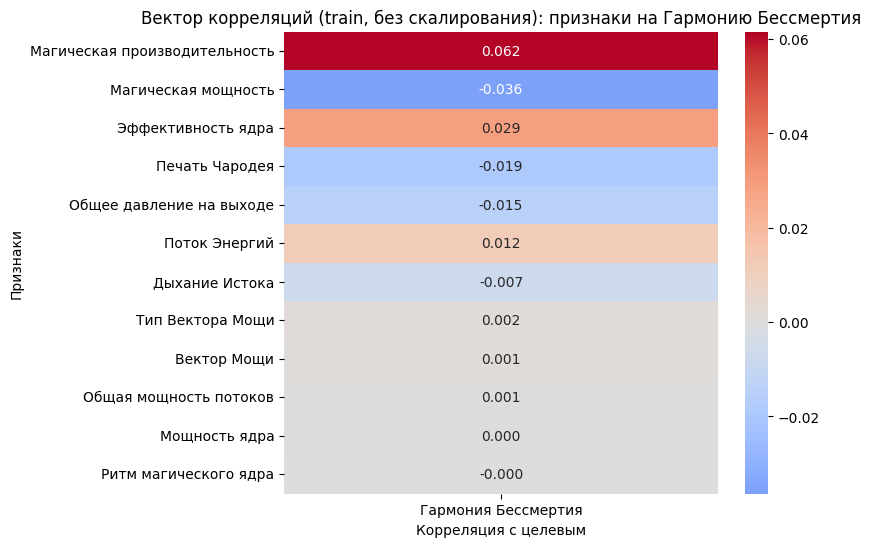

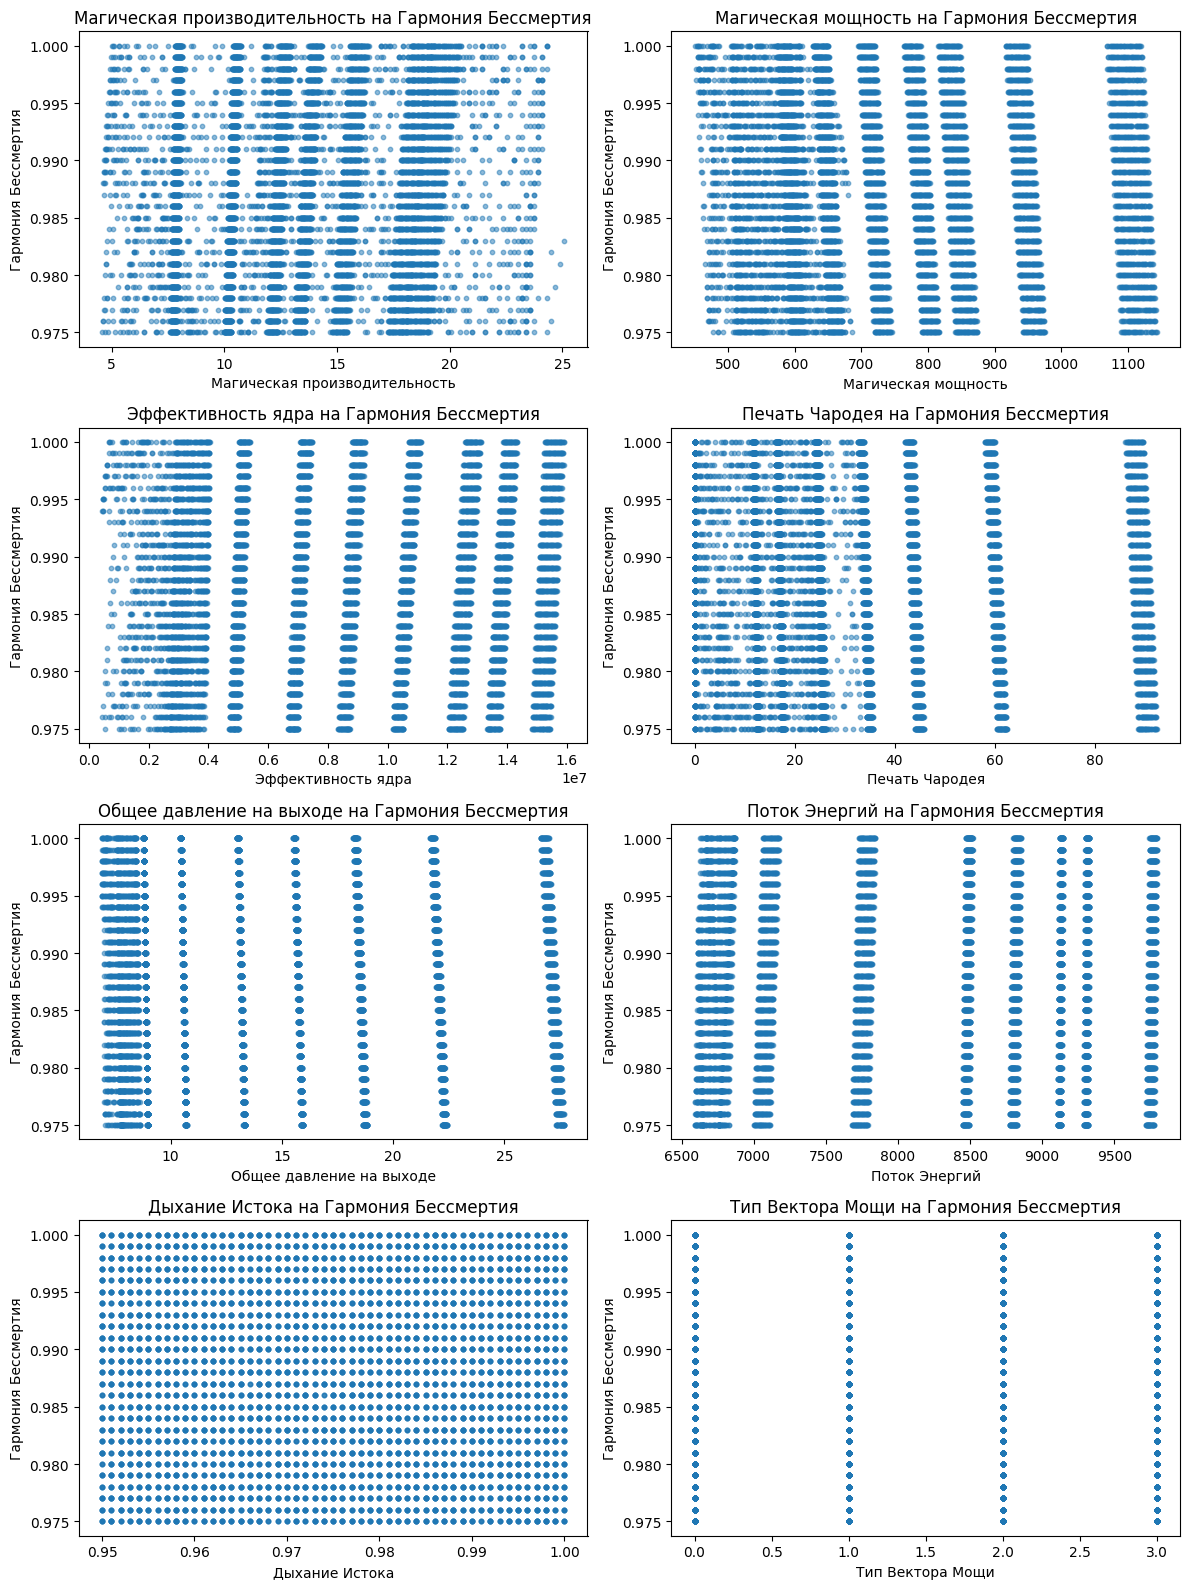

In [122]:
import math

TARGET_COL = "Гармония Бессмертия"

DATA_VERSIONS = {
    "no_scaling": (X_train_noscale, X_test_noscale),
    "standard": (X_train_scale_std, X_test_scale_std),
    "minmax": (X_train_scale_mm, X_test_scale_mm),
    "robust": (X_train_scale_rb, X_test_scale_rb),
}


print("y_train:", len(y_train), "y_test:", len(y_test))
for ver, (Xtr, Xte) in DATA_VERSIONS.items():
    print(ver, "Xtr:", Xtr.shape, "Xte:", Xte.shape)


def corr_vector_heatmap(X: pd.DataFrame, y: pd.Series, title: str, top_n: int = 25) -> pd.DataFrame:
    X_num = X.select_dtypes(include=[np.number]).copy()

    corr = X_num.apply(lambda col: col.corr(y))
    corr_df = (
        corr.to_frame(TARGET_COL)
        .sort_values(TARGET_COL, key=lambda s: s.abs(), ascending=False)
        .head(top_n)
    )

    plt.figure(figsize=(7, max(6, 0.28 * len(corr_df))))
    sns.heatmap(corr_df, annot=True, fmt=".3f", center=0, cmap="coolwarm")
    plt.title(title)
    plt.ylabel("Признаки")
    plt.xlabel("Корреляция с целевым")
    plt.show()

    return corr_df


def scatter_top_correlated(X: pd.DataFrame, y: pd.Series, corr_df: pd.DataFrame, top_n: int = 8) -> None:
    top_features = corr_df.index[:top_n].tolist()
    top_features = [f for f in top_features if f in X.columns]

    cols = 2
    rows = math.ceil(len(top_features) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = np.array(axes).reshape(-1)

    for i, col in enumerate(top_features):
        axes[i].scatter(X[col].values, y.values, s=10, alpha=0.5)
        axes[i].set_title(f"{col} на {TARGET_COL}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(TARGET_COL)

    for j in range(len(top_features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


corr_df_noscale = corr_vector_heatmap(
    DATA_VERSIONS["no_scaling"][0],
    y_train,
    title="Вектор корреляций (train, без скалирования): признаки на Гармонию Бессмертия",
    top_n=25
)
scatter_top_correlated(
    DATA_VERSIONS["no_scaling"][0], y_train, corr_df_noscale, top_n=8)

По тепловой карте видно, что линейная связь между отдельными признаками и целевым показателем `Гармония Бессмертия` довольно слабая: значения корреляции по всем признакам малы по модулю.

Наибольшую, хотя и незначительную, корреляцию показывает признак `Магическая производительность`, что подтверждается более заметным, но всё ещё размытым распределением точек на графике.

Для остальных признаков выраженной линейной зависимости с целевой переменной не наблюдается: точки распределены равномерно. Это указывает на отсутствие сильных линейных зависимостей и подтвержадет применение нелинейных моделей машинного обучения.

In [134]:
import optuna

from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR


MODEL_POOL = ["ridge", "elasticnet", "random_forest", "hist_gb"]

In [135]:
def build_model(model_name: str, params: dict, seed: int = SEED):
    if model_name == "ridge":
        return Ridge(random_state=seed, **params)

    if model_name == "elasticnet":
        return ElasticNet(random_state=seed, max_iter=20000, **params)

    if model_name == "random_forest":
        return RandomForestRegressor(random_state=seed, n_jobs=-1, **params)

    if model_name == "hist_gb":
        try:
            return HistGradientBoostingRegressor(random_state=seed, **params)
        except TypeError:
            return HistGradientBoostingRegressor(**params)

In [137]:
def suggest_params(trial: optuna.Trial, model_name: str) -> dict:
    if model_name == "ridge":
        return {"alpha": trial.suggest_float("alpha", 1e-4, 1e3, log=True)}

    if model_name == "elasticnet":
        return {
            "alpha": trial.suggest_float("alpha", 1e-4, 1e2, log=True),
            "l1_ratio": trial.suggest_float("l1_ratio", 0.0, 1.0),
        }

    if model_name == "random_forest":
        return {
            "n_estimators": trial.suggest_int("n_estimators", 200, 900),
            "max_depth": trial.suggest_int("max_depth", 3, 30),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 30),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 15),
            "max_features": trial.suggest_float("max_features", 0.3, 1.0),
            "bootstrap": trial.suggest_categorical("bootstrap", [True, False]),
        }

    if model_name == "hist_gb":
        return {
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "max_depth": trial.suggest_int("max_depth", 2, 12),
            "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 15, 255),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 10, 150),
            "l2_regularization": trial.suggest_float("l2_regularization", 1e-6, 10.0, log=True),
            "max_bins": trial.suggest_int("max_bins", 64, 255),
        }

In [126]:
from sklearn.metrics import mean_absolute_error, r2_score

In [138]:
def rmse(y_true, y_pred) -> float:
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    return float(np.sqrt(np.mean((y_true - y_pred) ** 2)))


def compute_metrics(y_true, y_pred) -> dict:
    return {
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "RMSE": float(rmse(y_true, y_pred)),
        "R2": float(r2_score(y_true, y_pred)),
    }


TARGET_METRIC_NAME = "RMSE"

# 4. Обучение моделей ML и подбор гиперпараметров

In [139]:
from sklearn.model_selection import KFold

In [140]:
N_SPLITS = 5
N_TRIALS = 25

best_studies = {}
best_params = {}
best_models = {}

sampler = optuna.samplers.TPESampler(seed=SEED)
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)


def cv_score_rmse(model, X: pd.DataFrame, y: pd.Series, n_splits: int = 5, seed: int = SEED) -> float:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    scores = []

    for tr_idx, val_idx in kf.split(X):
        X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]

        model.fit(X_tr, y_tr)
        pred = model.predict(X_val)
        scores.append(rmse(y_val, pred))

    return float(np.mean(scores))


for version_name, (Xtr, Xte) in DATA_VERSIONS.items():
    print("\n" + "=" * 90)
    print(
        f"Версия данных: {version_name} | X_train={Xtr.shape} | X_test={Xte.shape}")

    for model_name in MODEL_POOL:
        def objective(trial: optuna.Trial) -> float:
            params = suggest_params(trial, model_name)
            model = build_model(model_name, params, seed=SEED)
            score = cv_score_rmse(model, Xtr,
                                  y_train, n_splits=N_SPLITS, seed=SEED)
            return score

        study = optuna.create_study(
            direction="minimize", sampler=sampler, pruner=pruner)
        study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=False)

        best_studies[(version_name, model_name)] = study
        best_params[(version_name, model_name)] = study.best_params

        final_model = build_model(model_name, study.best_params, seed=SEED)
        final_model.fit(Xtr, y_train)
        best_models[(version_name, model_name)] = final_model

        print(
            f"- {model_name:14s} | best CV RMSE = {study.best_value:.5f} | params = {study.best_params}")

print("\nГотово: подобраны гиперпараметры и обучены лучшие модели для всех версий данных.")

[I 2026-01-09 20:13:29,656] A new study created in memory with name: no-name-a8562800-f7c9-412c-923d-51b30b78fc37
[I 2026-01-09 20:13:29,674] Trial 0 finished with value: 0.0044866633213215545 and parameters: {'alpha': 0.041858227295469716}. Best is trial 0 with value: 0.0044866633213215545.
[I 2026-01-09 20:13:29,690] Trial 1 finished with value: 0.005726779415676416 and parameters: {'alpha': 451.85609510240965}. Best is trial 0 with value: 0.0044866633213215545.
[I 2026-01-09 20:13:29,703] Trial 2 finished with value: 0.004508158981404018 and parameters: {'alpha': 13.3032451015229}. Best is trial 0 with value: 0.0044866633213215545.
[I 2026-01-09 20:13:29,718] Trial 3 finished with value: 0.004486757301225089 and parameters: {'alpha': 1.55099139875943}. Best is trial 0 with value: 0.0044866633213215545.
[I 2026-01-09 20:13:29,730] Trial 4 finished with value: 0.004486718786863799 and parameters: {'alpha': 0.0012363188277052211}. Best is trial 0 with value: 0.0044866633213215545.
[I 2


Версия данных: no_scaling | X_train=(9504, 12) | X_test=(2387, 12)


[I 2026-01-09 20:13:29,866] Trial 14 finished with value: 0.0044865398421379404 and parameters: {'alpha': 0.21008469056904142}. Best is trial 14 with value: 0.0044865398421379404.
[I 2026-01-09 20:13:29,884] Trial 15 finished with value: 0.004486501659801466 and parameters: {'alpha': 0.35007694079467766}. Best is trial 15 with value: 0.004486501659801466.
[I 2026-01-09 20:13:29,900] Trial 16 finished with value: 0.0044864935825361125 and parameters: {'alpha': 0.5839082727519415}. Best is trial 16 with value: 0.0044864935825361125.
[I 2026-01-09 20:13:29,914] Trial 17 finished with value: 0.004486491464299666 and parameters: {'alpha': 0.5364321346032482}. Best is trial 17 with value: 0.004486491464299666.
[I 2026-01-09 20:13:29,927] Trial 18 finished with value: 0.0045176942684437725 and parameters: {'alpha': 16.31647335758847}. Best is trial 17 with value: 0.004486491464299666.
[I 2026-01-09 20:13:29,940] Trial 19 finished with value: 0.004486711532176652 and parameters: {'alpha': 0.00

- ridge          | best CV RMSE = 0.00449 | params = {'alpha': 0.5364321346032482}


[I 2026-01-09 20:13:33,925] Trial 0 finished with value: 0.004642317556533843 and parameters: {'alpha': 0.00013289448722869195, 'l1_ratio': 0.9699098521619943}. Best is trial 0 with value: 0.004642317556533843.
[I 2026-01-09 20:13:33,943] Trial 1 finished with value: 0.007476159890306601 and parameters: {'alpha': 9.877700294007917, 'l1_ratio': 0.21233911067827616}. Best is trial 0 with value: 0.004642317556533843.
[I 2026-01-09 20:13:37,825] Trial 2 finished with value: 0.0049339144405341 and parameters: {'alpha': 0.0012329623163659848, 'l1_ratio': 0.18340450985343382}. Best is trial 0 with value: 0.004642317556533843.
[I 2026-01-09 20:13:41,300] Trial 3 finished with value: 0.006885256966664826 and parameters: {'alpha': 0.006690421166498805, 'l1_ratio': 0.5247564316322378}. Best is trial 0 with value: 0.004642317556533843.
[I 2026-01-09 20:13:43,516] Trial 4 finished with value: 0.007037505967982341 and parameters: {'alpha': 0.039054412752107935, 'l1_ratio': 0.2912291401980419}. Best 

- elasticnet     | best CV RMSE = 0.00460 | params = {'alpha': 0.00010623143601515476, 'l1_ratio': 0.9657939621161546}


[I 2026-01-09 20:14:54,320] Trial 0 finished with value: 0.004474072488640601 and parameters: {'n_estimators': 625, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': 0.9759424231521916, 'bootstrap': True}. Best is trial 0 with value: 0.004474072488640601.
[I 2026-01-09 20:15:02,010] Trial 1 finished with value: 0.0008538649065970071 and parameters: {'n_estimators': 268, 'max_depth': 22, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 0.6466238370778892, 'bootstrap': False}. Best is trial 1 with value: 0.0008538649065970071.
[I 2026-01-09 20:15:13,654] Trial 2 finished with value: 0.0009753776026779354 and parameters: {'n_estimators': 381, 'max_depth': 21, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 0.6826971955402957, 'bootstrap': False}. Best is trial 1 with value: 0.0008538649065970071.
[I 2026-01-09 20:15:42,826] Trial 3 finished with value: 0.001370278057527495 and parameters: {'n_estimators': 743, 'max_depth': 29, '

- random_forest  | best CV RMSE = 0.00064 | params = {'n_estimators': 510, 'max_depth': 25, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.730989589149937, 'bootstrap': False}


[I 2026-01-09 20:20:58,634] Trial 0 finished with value: 0.004301714006429853 and parameters: {'learning_rate': 0.011128194768838964, 'max_depth': 9, 'max_leaf_nodes': 90, 'min_samples_leaf': 81, 'l2_regularization': 2.254059197042614, 'max_bins': 111}. Best is trial 0 with value: 0.004301714006429853.
[I 2026-01-09 20:21:00,082] Trial 1 finished with value: 0.0014892110654170405 and parameters: {'learning_rate': 0.040381768820718394, 'max_depth': 10, 'max_leaf_nodes': 70, 'min_samples_leaf': 20, 'l2_regularization': 0.00010672352725043793, 'max_bins': 94}. Best is trial 1 with value: 0.0014892110654170405.
[I 2026-01-09 20:21:00,651] Trial 2 finished with value: 0.0011275125729327171 and parameters: {'learning_rate': 0.23619797107806514, 'max_depth': 10, 'max_leaf_nodes': 167, 'min_samples_leaf': 132, 'l2_regularization': 0.42238115972862367, 'max_bins': 99}. Best is trial 2 with value: 0.0011275125729327171.
[I 2026-01-09 20:21:01,107] Trial 3 finished with value: 0.00130028837190872

- hist_gb        | best CV RMSE = 0.00081 | params = {'learning_rate': 0.2984699961246929, 'max_depth': 11, 'max_leaf_nodes': 61, 'min_samples_leaf': 54, 'l2_regularization': 0.8063022214606388, 'max_bins': 229}

Версия данных: standard | X_train=(9504, 12) | X_test=(2387, 12)


[I 2026-01-09 20:21:16,310] Trial 15 finished with value: 0.004486720197917484 and parameters: {'alpha': 0.0004763154217052894}. Best is trial 15 with value: 0.004486720197917484.
[I 2026-01-09 20:21:16,323] Trial 16 finished with value: 0.00691158851572571 and parameters: {'alpha': 122.51058178194903}. Best is trial 15 with value: 0.004486720197917484.
[I 2026-01-09 20:21:16,337] Trial 17 finished with value: 0.004486727284512014 and parameters: {'alpha': 0.0032874966112124435}. Best is trial 15 with value: 0.004486720197917484.
[I 2026-01-09 20:21:16,349] Trial 18 finished with value: 0.004498329423977923 and parameters: {'alpha': 0.1252017014231215}. Best is trial 15 with value: 0.004486720197917484.
[I 2026-01-09 20:21:16,362] Trial 19 finished with value: 0.0058263050133558255 and parameters: {'alpha': 18.829130748591954}. Best is trial 15 with value: 0.004486720197917484.
[I 2026-01-09 20:21:16,375] Trial 20 finished with value: 0.00448672013452146 and parameters: {'alpha': 0.000

- ridge          | best CV RMSE = 0.00449 | params = {'alpha': 0.0006593659386913017}


[I 2026-01-09 20:21:20,947] Trial 10 finished with value: 0.004672104194542178 and parameters: {'alpha': 0.00010607551520344515, 'l1_ratio': 0.014932056021905393}. Best is trial 10 with value: 0.004672104194542178.
[I 2026-01-09 20:21:23,485] Trial 11 finished with value: 0.004881124700112691 and parameters: {'alpha': 0.00018432596619352313, 'l1_ratio': 0.035025727429565584}. Best is trial 10 with value: 0.004672104194542178.
[I 2026-01-09 20:21:27,836] Trial 12 finished with value: 0.0046493557133987585 and parameters: {'alpha': 0.00010472553982420469, 'l1_ratio': 0.001858085684393971}. Best is trial 12 with value: 0.0046493557133987585.
[I 2026-01-09 20:21:28,870] Trial 13 finished with value: 0.005477811483914366 and parameters: {'alpha': 0.00010552408448234315, 'l1_ratio': 0.34286633719230086}. Best is trial 12 with value: 0.0046493557133987585.
[I 2026-01-09 20:21:28,886] Trial 14 finished with value: 0.007489852433661998 and parameters: {'alpha': 0.0015156707935066994, 'l1_ratio'

- elasticnet     | best CV RMSE = 0.00465 | params = {'alpha': 0.00010472553982420469, 'l1_ratio': 0.001858085684393971}


[I 2026-01-09 20:21:44,473] Trial 0 finished with value: 0.0012022016539319554 and parameters: {'n_estimators': 265, 'max_depth': 28, 'min_samples_split': 28, 'min_samples_leaf': 10, 'max_features': 0.5373208537340904, 'bootstrap': False}. Best is trial 0 with value: 0.0012022016539319554.
[I 2026-01-09 20:21:57,557] Trial 1 finished with value: 0.0012542198571456474 and parameters: {'n_estimators': 828, 'max_depth': 27, 'min_samples_split': 24, 'min_samples_leaf': 10, 'max_features': 0.3588979754965342, 'bootstrap': False}. Best is trial 0 with value: 0.0012022016539319554.
[I 2026-01-09 20:22:00,397] Trial 2 finished with value: 0.006811467450194779 and parameters: {'n_estimators': 625, 'max_depth': 3, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': 0.30354310869235307, 'bootstrap': False}. Best is trial 0 with value: 0.0012022016539319554.
[I 2026-01-09 20:22:13,372] Trial 3 finished with value: 0.0012131435917407778 and parameters: {'n_estimators': 685, 'max_depth':

- random_forest  | best CV RMSE = 0.00081 | params = {'n_estimators': 873, 'max_depth': 21, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 0.7034294537864354, 'bootstrap': False}


[I 2026-01-09 20:29:15,127] Trial 0 finished with value: 0.001201515389332432 and parameters: {'learning_rate': 0.08099164993582626, 'max_depth': 12, 'max_leaf_nodes': 48, 'min_samples_leaf': 83, 'l2_regularization': 1.3855158663169398, 'max_bins': 206}. Best is trial 0 with value: 0.001201515389332432.
[I 2026-01-09 20:29:16,077] Trial 1 finished with value: 0.0009838330828786236 and parameters: {'learning_rate': 0.10704755834674413, 'max_depth': 9, 'max_leaf_nodes': 101, 'min_samples_leaf': 51, 'l2_regularization': 0.46294360406431123, 'max_bins': 219}. Best is trial 1 with value: 0.0009838330828786236.
[I 2026-01-09 20:29:16,960] Trial 2 finished with value: 0.0009055030255707252 and parameters: {'learning_rate': 0.19088462590130242, 'max_depth': 12, 'max_leaf_nodes': 138, 'min_samples_leaf': 80, 'l2_regularization': 0.38731672660205535, 'max_bins': 188}. Best is trial 2 with value: 0.0009055030255707252.
[I 2026-01-09 20:29:17,834] Trial 3 finished with value: 0.001127222629038986 

- hist_gb        | best CV RMSE = 0.00080 | params = {'learning_rate': 0.2128290295729388, 'max_depth': 10, 'max_leaf_nodes': 200, 'min_samples_leaf': 26, 'l2_regularization': 0.09153101953507521, 'max_bins': 156}

Версия данных: minmax | X_train=(9504, 12) | X_test=(2387, 12)


[I 2026-01-09 20:29:36,387] Trial 15 finished with value: 0.0044868319219437975 and parameters: {'alpha': 0.0010460799473339328}. Best is trial 13 with value: 0.004486720264334367.
[I 2026-01-09 20:29:36,400] Trial 16 finished with value: 0.004659720882106515 and parameters: {'alpha': 0.08286123084942702}. Best is trial 13 with value: 0.004486720264334367.
[I 2026-01-09 20:29:36,413] Trial 17 finished with value: 0.004486730896362634 and parameters: {'alpha': 0.0003696041137102389}. Best is trial 13 with value: 0.004486720264334367.
[I 2026-01-09 20:29:36,427] Trial 18 finished with value: 0.004500373668614592 and parameters: {'alpha': 0.013241276311183143}. Best is trial 13 with value: 0.004486720264334367.
[I 2026-01-09 20:29:36,441] Trial 19 finished with value: 0.004486870872643481 and parameters: {'alpha': 0.001206949945845132}. Best is trial 13 with value: 0.004486720264334367.
[I 2026-01-09 20:29:36,454] Trial 20 finished with value: 0.007448719355060568 and parameters: {'alpha'

- ridge          | best CV RMSE = 0.00449 | params = {'alpha': 0.00010646025329887701}


[I 2026-01-09 20:29:36,883] Trial 1 finished with value: 0.006228235883068285 and parameters: {'alpha': 0.00012200030931738254, 'l1_ratio': 0.11607264050691624}. Best is trial 1 with value: 0.006228235883068285.
[I 2026-01-09 20:29:37,193] Trial 2 finished with value: 0.006092444240761861 and parameters: {'alpha': 0.00018880602636985874, 'l1_ratio': 0.040728802318970136}. Best is trial 2 with value: 0.006092444240761861.
[I 2026-01-09 20:29:37,207] Trial 3 finished with value: 0.007489852433661998 and parameters: {'alpha': 13.575739756252508, 'l1_ratio': 0.7036578593800237}. Best is trial 2 with value: 0.006092444240761861.
[I 2026-01-09 20:29:37,221] Trial 4 finished with value: 0.007489852433661998 and parameters: {'alpha': 0.06999112505425423, 'l1_ratio': 0.09783416065100148}. Best is trial 2 with value: 0.006092444240761861.
[I 2026-01-09 20:29:37,235] Trial 5 finished with value: 0.007489852433661998 and parameters: {'alpha': 0.08906257567487345, 'l1_ratio': 0.4734717707805657}. B

- elasticnet     | best CV RMSE = 0.00609 | params = {'alpha': 0.00018880602636985874, 'l1_ratio': 0.040728802318970136}


[I 2026-01-09 20:29:44,234] Trial 0 finished with value: 0.0013171329250856304 and parameters: {'n_estimators': 552, 'max_depth': 26, 'min_samples_split': 21, 'min_samples_leaf': 3, 'max_features': 0.3493981231803009, 'bootstrap': True}. Best is trial 0 with value: 0.0013171329250856304.
[I 2026-01-09 20:30:03,550] Trial 1 finished with value: 0.0009759095668722941 and parameters: {'n_estimators': 610, 'max_depth': 29, 'min_samples_split': 18, 'min_samples_leaf': 6, 'max_features': 0.7503017529096472, 'bootstrap': False}. Best is trial 1 with value: 0.0009759095668722941.
[I 2026-01-09 20:30:17,627] Trial 2 finished with value: 0.002408651463639044 and parameters: {'n_estimators': 859, 'max_depth': 13, 'min_samples_split': 29, 'min_samples_leaf': 14, 'max_features': 0.43705379435250746, 'bootstrap': False}. Best is trial 1 with value: 0.0009759095668722941.
[I 2026-01-09 20:30:19,382] Trial 3 finished with value: 0.005839516035387134 and parameters: {'n_estimators': 212, 'max_depth': 5

- random_forest  | best CV RMSE = 0.00092 | params = {'n_estimators': 340, 'max_depth': 24, 'min_samples_split': 13, 'min_samples_leaf': 7, 'max_features': 0.6809160077686102, 'bootstrap': False}


[I 2026-01-09 20:34:31,410] Trial 0 finished with value: 0.0010019099085483486 and parameters: {'learning_rate': 0.14765842451489417, 'max_depth': 10, 'max_leaf_nodes': 36, 'min_samples_leaf': 79, 'l2_regularization': 2.5287815842822406e-06, 'max_bins': 169}. Best is trial 0 with value: 0.0010019099085483486.
[I 2026-01-09 20:34:33,500] Trial 1 finished with value: 0.0011518676364855776 and parameters: {'learning_rate': 0.044894598111473304, 'max_depth': 11, 'max_leaf_nodes': 99, 'min_samples_leaf': 26, 'l2_regularization': 1.002170868555473e-05, 'max_bins': 210}. Best is trial 0 with value: 0.0010019099085483486.
[I 2026-01-09 20:34:33,820] Trial 2 finished with value: 0.003321033608002344 and parameters: {'learning_rate': 0.08188098178380697, 'max_depth': 3, 'max_leaf_nodes': 35, 'min_samples_leaf': 108, 'l2_regularization': 3.231030402518633e-06, 'max_bins': 221}. Best is trial 0 with value: 0.0010019099085483486.
[I 2026-01-09 20:34:34,077] Trial 3 finished with value: 0.0037402449

- hist_gb        | best CV RMSE = 0.00082 | params = {'learning_rate': 0.20070544731669493, 'max_depth': 8, 'max_leaf_nodes': 73, 'min_samples_leaf': 36, 'l2_regularization': 0.02508529571810542, 'max_bins': 213}

Версия данных: robust | X_train=(9504, 12) | X_test=(2387, 12)


[I 2026-01-09 20:34:54,470] Trial 15 finished with value: 0.004491860954413273 and parameters: {'alpha': 0.0349674862160768}. Best is trial 6 with value: 0.004486720227817463.
[I 2026-01-09 20:34:54,484] Trial 16 finished with value: 0.004486723267620249 and parameters: {'alpha': 0.0010908783541855125}. Best is trial 6 with value: 0.004486720227817463.
[I 2026-01-09 20:34:54,498] Trial 17 finished with value: 0.004486720270073791 and parameters: {'alpha': 0.0004752122442021754}. Best is trial 6 with value: 0.004486720227817463.
[I 2026-01-09 20:34:54,511] Trial 18 finished with value: 0.004489704120437999 and parameters: {'alpha': 0.026013702053129556}. Best is trial 6 with value: 0.004486720227817463.
[I 2026-01-09 20:34:54,524] Trial 19 finished with value: 0.004486906997288532 and parameters: {'alpha': 0.006354337080765121}. Best is trial 6 with value: 0.004486720227817463.
[I 2026-01-09 20:34:54,537] Trial 20 finished with value: 0.004486720156607598 and parameters: {'alpha': 0.000

- ridge          | best CV RMSE = 0.00449 | params = {'alpha': 0.0003332511890669714}


[I 2026-01-09 20:34:55,039] Trial 10 finished with value: 0.006609130604672721 and parameters: {'alpha': 0.00010123133156095696, 'l1_ratio': 0.5388648947289318}. Best is trial 10 with value: 0.006609130604672721.
[I 2026-01-09 20:34:55,057] Trial 11 finished with value: 0.0074796531922061826 and parameters: {'alpha': 0.00030448415963150994, 'l1_ratio': 0.5123247130284522}. Best is trial 10 with value: 0.006609130604672721.
[I 2026-01-09 20:34:55,444] Trial 12 finished with value: 0.00607187640181706 and parameters: {'alpha': 0.0001055568984364412, 'l1_ratio': 0.381751551729654}. Best is trial 12 with value: 0.00607187640181706.
[I 2026-01-09 20:34:55,511] Trial 13 finished with value: 0.007006169985806577 and parameters: {'alpha': 0.00020962738128187607, 'l1_ratio': 0.33335641110677416}. Best is trial 12 with value: 0.00607187640181706.
[I 2026-01-09 20:34:55,529] Trial 14 finished with value: 0.007489852433661998 and parameters: {'alpha': 0.0014636869104618544, 'l1_ratio': 0.379959838

- elasticnet     | best CV RMSE = 0.00590 | params = {'alpha': 0.0006407461779212487, 'l1_ratio': 0.025052617374705488}


[I 2026-01-09 20:35:04,506] Trial 0 finished with value: 0.0024046156352992313 and parameters: {'n_estimators': 630, 'max_depth': 14, 'min_samples_split': 29, 'min_samples_leaf': 13, 'max_features': 0.33165306907433256, 'bootstrap': False}. Best is trial 0 with value: 0.0024046156352992313.
[I 2026-01-09 20:35:15,367] Trial 1 finished with value: 0.0012649321450347523 and parameters: {'n_estimators': 768, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 0.566623599641715, 'bootstrap': True}. Best is trial 1 with value: 0.0012649321450347523.
[I 2026-01-09 20:35:23,693] Trial 2 finished with value: 0.0017134221612730063 and parameters: {'n_estimators': 787, 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 5, 'max_features': 0.33946284765564894, 'bootstrap': True}. Best is trial 1 with value: 0.0012649321450347523.
[I 2026-01-09 20:35:43,454] Trial 3 finished with value: 0.001275795547163107 and parameters: {'n_estimators': 900, 'max_depth': 30

- random_forest  | best CV RMSE = 0.00066 | params = {'n_estimators': 212, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.741487548945031, 'bootstrap': False}


[I 2026-01-09 20:38:57,079] Trial 0 finished with value: 0.0014323397102541907 and parameters: {'learning_rate': 0.04766495467029922, 'max_depth': 12, 'max_leaf_nodes': 133, 'min_samples_leaf': 56, 'l2_regularization': 0.02715225978619444, 'max_bins': 110}. Best is trial 0 with value: 0.0014323397102541907.
[I 2026-01-09 20:38:57,426] Trial 1 finished with value: 0.006173087978254252 and parameters: {'learning_rate': 0.012943726698159996, 'max_depth': 3, 'max_leaf_nodes': 45, 'min_samples_leaf': 31, 'l2_regularization': 9.371092150871407e-06, 'max_bins': 187}. Best is trial 0 with value: 0.0014323397102541907.
[I 2026-01-09 20:38:57,949] Trial 2 finished with value: 0.004468352389996592 and parameters: {'learning_rate': 0.018563460509224687, 'max_depth': 5, 'max_leaf_nodes': 231, 'min_samples_leaf': 76, 'l2_regularization': 0.04708734131628906, 'max_bins': 97}. Best is trial 0 with value: 0.0014323397102541907.
[I 2026-01-09 20:38:58,209] Trial 3 finished with value: 0.0062212869844153

- hist_gb        | best CV RMSE = 0.00089 | params = {'learning_rate': 0.19730694047321637, 'max_depth': 12, 'max_leaf_nodes': 72, 'min_samples_leaf': 85, 'l2_regularization': 1.1805266022035716e-06, 'max_bins': 173}

Готово: подобраны гиперпараметры и обучены лучшие модели для всех версий данных.


# 5. Вычисление метрик на новых данных

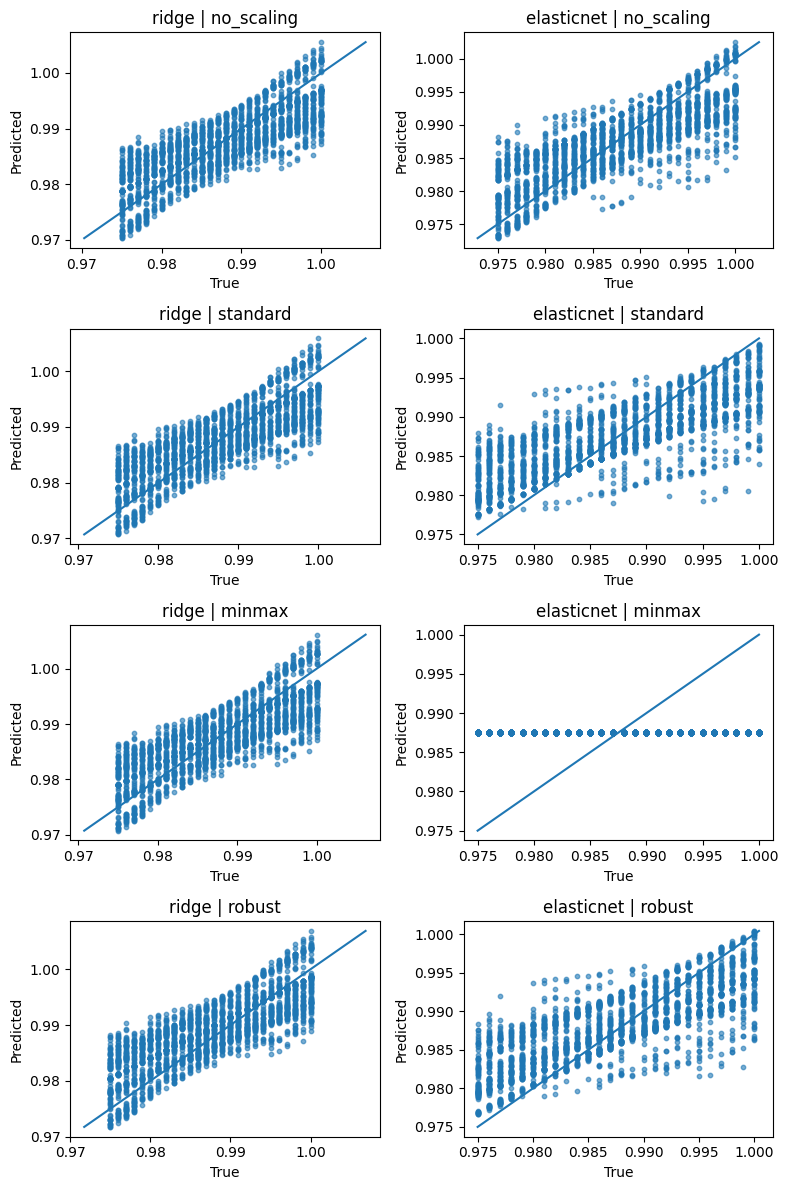

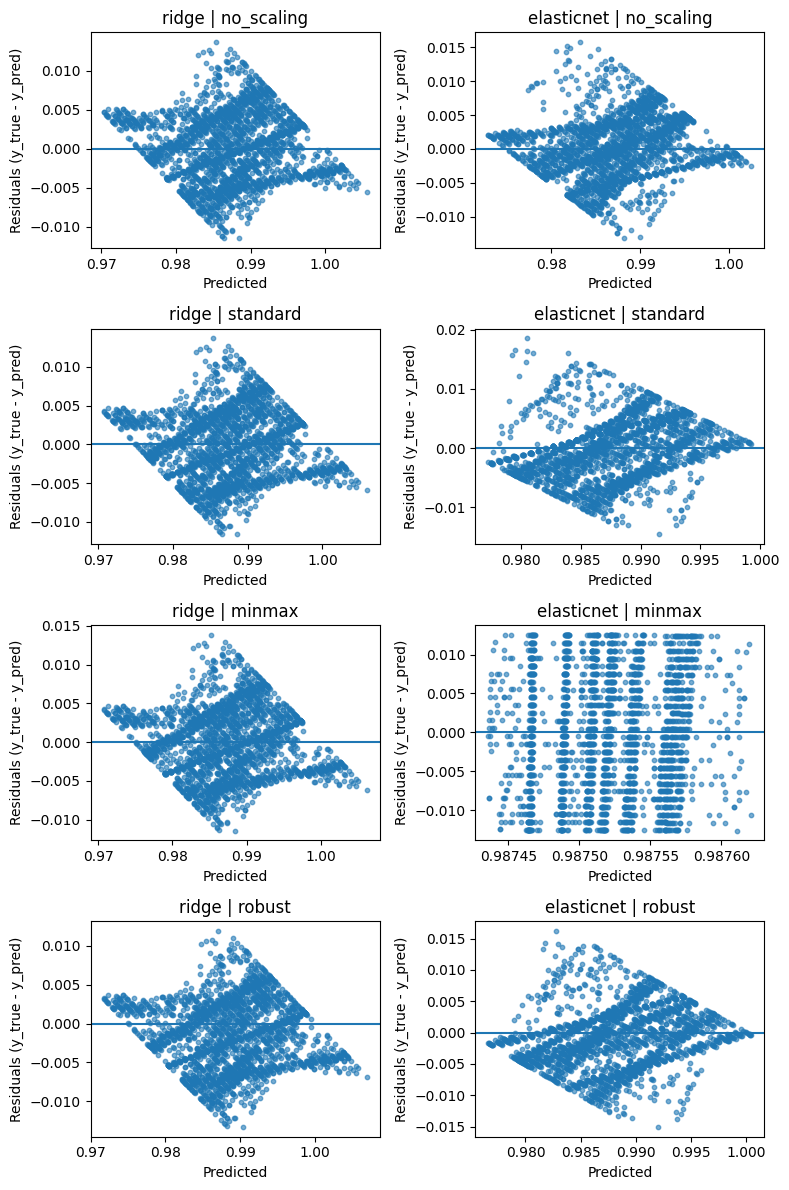

In [130]:
def plot_pred_vs_actual_grid(DATA_VERSIONS, MODEL_POOL, best_models, y_test, max_cols: int = 4):
    n_versions = len(DATA_VERSIONS)
    n_models = len(MODEL_POOL)
    n_plots = n_versions * n_models

    cols = min(max_cols, n_models)
    rows = math.ceil(n_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows))
    axes = np.array(axes).reshape(-1)

    k = 0
    for version_name, (Xtr, Xte) in DATA_VERSIONS.items():
        for model_name in MODEL_POOL:
            ax = axes[k]
            model = best_models[(version_name, model_name)]
            pred = model.predict(Xte)[:len(y_test)]

            ax.scatter(y_test, pred, s=10, alpha=0.6)

            mn = min(float(y_test.min()), float(pred.min()))
            mx = max(float(y_test.max()), float(pred.max()))
            ax.plot([mn, mx], [mn, mx])

            ax.set_title(f"{model_name} | {version_name}")
            ax.set_xlabel("True")
            ax.set_ylabel("Predicted")
            k += 1

    for j in range(k, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


def plot_residuals_grid(DATA_VERSIONS, MODEL_POOL, best_models, y_test, max_cols: int = 4):
    n_versions = len(DATA_VERSIONS)
    n_models = len(MODEL_POOL)
    n_plots = n_versions * n_models

    cols = min(max_cols, n_models)
    rows = math.ceil(n_plots / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 3 * rows))
    axes = np.array(axes).reshape(-1)

    k = 0
    for version_name, (Xtr, Xte) in DATA_VERSIONS.items():
        for model_name in MODEL_POOL:
            ax = axes[k]
            model = best_models[(version_name, model_name)]
            pred = model.predict(Xte)[:len(y_test)]
            residuals = y_test.values - pred

            ax.scatter(pred, residuals, s=10, alpha=0.6)
            ax.axhline(0)

            ax.set_title(f"{model_name} | {version_name}")
            ax.set_xlabel("Predicted")
            ax.set_ylabel("Residuals (y_true - y_pred)")
            k += 1

    for j in range(k, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_pred_vs_actual_grid(DATA_VERSIONS, MODEL_POOL,
                         best_models, y_test, max_cols=4)
plot_residuals_grid(DATA_VERSIONS, MODEL_POOL, best_models, y_test, max_cols=4)

`RandomForest` и `HistGradientBoosting` дают наилучшее качество: точки лежат близко к диагонали, остатки собраны около нуля.

`Ridge` и `ElasticNet` заметно хуже: видно дискретность и остатки имеют явную структуру.

Скалирование существенно влияет на линейные модели, но почти не сказывается на ансамблевых.

Графики подтверждают результаты метрик: ансамблевые модели работают лучше линейных.

In [141]:
def compute_metrics_aligned(y: pd.Series, y_pred: np.ndarray, X: pd.DataFrame) -> dict:
    if hasattr(y, "loc") and hasattr(X, "index"):
        common = X.index.intersection(y.index)
        if len(common) > 0:
            return compute_metrics(y.loc[common], y_pred[:len(common)])
    n = min(len(y), len(y_pred), len(X))
    return compute_metrics(y.iloc[:n], y_pred[:n])


rows = []
for version_name, (Xtr, Xte) in DATA_VERSIONS.items():
    for model_name in MODEL_POOL:
        model = best_models[(version_name, model_name)]

        pred_tr = model.predict(Xtr)
        pred_te = model.predict(Xte)

        m_tr = compute_metrics_aligned(y_train, pred_tr, Xtr)
        m_te = compute_metrics_aligned(y_test,  pred_te, Xte)

        rows.append({
            "data_version": version_name,
            "model": model_name,
            "train_MAE": m_tr["MAE"],
            "train_RMSE": m_tr["RMSE"],
            "train_R2": m_tr["R2"],
            "test_MAE": m_te["MAE"],
            "test_RMSE": m_te["RMSE"],
            "test_R2": m_te["R2"],
        })

results = pd.DataFrame(rows)

long = results.melt(
    id_vars=["data_version", "model"],
    value_vars=["train_MAE", "train_RMSE", "train_R2",
                "test_MAE", "test_RMSE", "test_R2"],
    var_name="metric",
    value_name="value",
)

summary_grid = (
    long.pivot_table(
        index=["data_version", "model"],
        columns="metric",
        values="value"
    )
    .sort_index()
    .round(4)
)

summary_grid.index = [
    f"{m}_{dv}" for dv, m in summary_grid.index
]

display(summary_grid)

metric,test_MAE,test_R2,test_RMSE,train_MAE,train_R2,train_RMSE
elasticnet_minmax,0.0052,0.3532,0.0061,0.0052,0.3392,0.0061
hist_gb_minmax,0.0016,0.8414,0.0030,0.0004,0.9951,0.0005
random_forest_minmax,0.0015,0.8655,0.0028,0.0002,0.9967,0.0004
ridge_minmax,0.0036,0.6634,0.0044,0.0037,0.6420,0.0045
elasticnet_no_scaling,0.0036,0.6507,0.0045,0.0037,0.6234,0.0046
hist_gb_no_scaling,0.0005,0.9903,0.0007,0.0004,0.9948,0.0005
random_forest_no_scaling,0.0003,0.9955,0.0005,0.0000,1.0000,0.0000
ridge_no_scaling,0.0036,0.6646,0.0044,0.0037,0.6419,0.0045
elasticnet_robust,0.0050,0.3916,0.0059,0.0050,0.3801,0.0059
hist_gb_robust,0.0021,0.8703,0.0027,0.0005,0.9928,0.0006


# 6. Результат работы

По итогам работы была выполнена предобработка данных, обучение и сравнение нескольких моделей машинного обучения на разных версиях датасета. Лучшие результаты на тестовой выборке показала модель `RandomForestRegressor` без скалирования, показав минимальные ошибки (=RMSE = 0.0005, =MAE = 0.0003) и наибольший коэффициент детерминации (=R² = 0.996).

Модель `HistGradientBoostingRegressor` также показала высокое качество, однако немного уступила `RandomForestRegressor`. Линейные модели `Ridge` и `ElasticNet` оказались менее точными. Таким образом, `RandomForestRegressor` без скалирования рекомендуется как основная модель для практического применения.